## -------------------------GoodNature strikes and CO2 replacement rates analysis and modelling----------------------------

## Fields

<b>id</b> - unique identifier\
<b>when</b>\
<b>activityType</b> - see list below\
<b>strikeTime</b> - time the trap was triggered\
<b>batchId</b> - data is uploaded to the server in batches. Probably not useful.\
<b>createdBy</b> - user id\
<b>trapId</b>\
<b>groupId</b> - traps can be organised into groups\
<b>projectId</b> - Trap groups belong to a project. An organisation may have multiple projects. Dashboard users (Robbie to explain) can be identified by the presence of this field.\
    <b>killType</b> - if the user has specified it\
    <b>latitude</b>\
    <b>longitude</b>\
    <b>temperature</b>\
    <b>batteryLevel</b>\
    <b>hasImage</b> - whether the user has uploaded a photo of the kill\
    <b>trapInstalledAt</b>\

## Activity types

<b>STRIKE</b> - the trap fired\
<b>TEST_STRIKE</b> - the user was testing the trap (usually on initial setup)\
<b>CO2_LOW</b> \
<b>CO2_REPLACED</b> \
<b>NO_CO2_LEFT</b> \
<b>LURE_LOW</b> \
<b>LURE_REPLACED</b> \
<b>UNCOLLECTED_DATA</b> - the app detected new data on the trap but didn't get a chance to collect it\
<b>SYNCED</b> - the app communicated with the trap, whether there was new data or not. Note the large majority of rows are SYNCED rows and may not be of interest.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Files and QUT\Sem 3\IFN703\Result_3.tsv",sep='\t')
# df['strikeTime'] = pd.to_datetime(df['strikeTime'], format="%Y-%m-%d %H:%M:%S.%f%z", errors='coerce')
# df['when'] = pd.to_datetime(df['when'], format="%Y-%m-%d %H:%M:%S.%f%z", errors='coerce')
df

id                        when      activityType  \
0              1  2018-06-17 20:12:02.455+00            SYNCED   
1              4  2018-06-17 20:12:02.461+00            STRIKE   
2              7  2018-06-17 20:12:02.461+00            STRIKE   
3              2  2018-06-17 20:12:02.461+00            STRIKE   
4              6  2018-06-17 20:12:02.461+00            STRIKE   
...          ...                         ...               ...   
1094470  1407145  2021-08-01 21:02:34.786+00            STRIKE   
1094471  1407146  2021-08-01 21:02:34.866+00  UNCOLLECTED_DATA   
1094472  1407148  2021-08-01 21:02:40.056+00            SYNCED   
1094473  1407147  2021-08-01 21:02:40.056+00            SYNCED   
1094474  1407149  2021-08-01 21:03:02.053+00            SYNCED   

                     strikeTime   batchId  createdBy  trapId  groupId  \
0                           NaN       1.0        NaN       1      NaN   
1        2017-04-04 06:10:20+00       1.0        2.0       1      NaN   
2        2017-04-04 06:13:20+00       1.0        2.0       1      NaN   
3        2017-04-04 06:08:20+00       1.0        2.0       1      NaN   
4        2017-04-04 06:12:20+00       1.0        2.0       1      NaN   
...                         ...       ...        ...     ...      ...   
1094470  2021-07-28 10:30:03+00  118850.0    16255.0   30338      NaN   
1094471                     NaN       NaN    16255.0   30338      NaN   
1094472                     NaN       NaN        NaN   30338      NaN   
1094473                     NaN       NaN        NaN   30338      NaN   
1094474                     NaN       NaN        NaN    3883    498.0   

         organisationId killType   latitude   longitude  temperature  \
0                   NaN      NaN -41.277712  174.780174          NaN   
1                   NaN      NaN -41.277712  174.780174          NaN   
2                   NaN      NaN -41.277712  174.780174          NaN   
3                   NaN      NaN -41.277712  174.780174          NaN   
4                   NaN      NaN -41.277712  174.780174          NaN   
...                 ...      ...        ...         ...          ...   
1094470             NaN      NaN -36.731976  174.689250          8.0   
1094471             NaN      NaN -36.731976  174.689250          NaN   
1094472             NaN      NaN -36.731976  174.689250          NaN   
1094473             NaN      NaN -36.731976  174.689250          NaN   
1094474             9.0      NaN -41.124433  175.070783          NaN   

         batteryLevel  hasImage             trapInstalledAt  
0               100.0     False  2018-06-17 20:12:02.157+00  
1                 NaN     False  2018-06-17 20:12:02.157+00  
2                 NaN     False  2018-06-17 20:12:02.157+00  
3                 NaN     False  2018-06-17 20:12:02.157+00  
4                 NaN     False  2018-06-17 20:12:02.157+00  
...               ...       ...                         ...  
1094470           NaN     False  2021-06-20 01:41:52.175+00  
1094471           NaN     False  2021-06-20 01:41:52.175+00  
1094472           NaN     False  2021-06-20 01:41:52.175+00  
1094473           NaN     False  2021-06-20 01:41:52.175+00  
1094474           NaN     False  2019-05-07 04:56:35.146+00  

[1094475 rows x 16 columns]

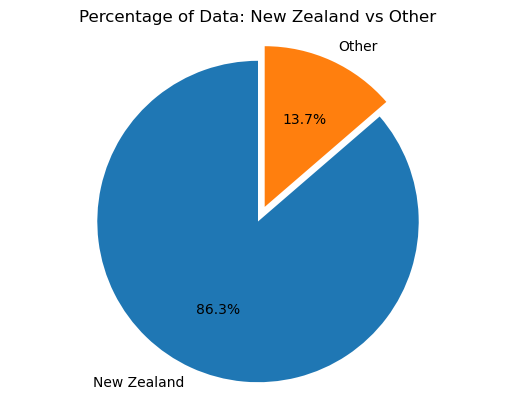

In [8]:
# Define the latitude and longitude ranges for New Zealand
min_latitude = -47.5
max_latitude = -33.5
min_longitude = 165.0
max_longitude = 179.0

# Filter the dataframe for New Zealand
dff = df[(df['latitude'] >= min_latitude) &
         (df['latitude'] <= max_latitude) &
         (df['longitude'] >= min_longitude) &
         (df['longitude'] <= max_longitude)]

# Calculate the percentage of New Zealand data
nz_percentage = (dff.shape[0] / df.shape[0]) * 100

# Calculate the percentage of Other data
other_percentage = 100 - nz_percentage

# Plot the percentages
labels = ['New Zealand', 'Other']
sizes = [nz_percentage, other_percentage]
colors = ['#1f77b4', '#ff7f0e']
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Data: New Zealand vs Other')
plt.show()


### explain non null columns

In [6]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094475 entries, 0 to 1094474
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   id               1094475 non-null  int64              
 1   when             1094475 non-null  datetime64[ns, UTC]
 2   activityType     1094475 non-null  object             
 3   strikeTime       140116 non-null   datetime64[ns, UTC]
 4   batchId          146897 non-null   float64            
 5   createdBy        200093 non-null   float64            
 6   trapId           1094475 non-null  int64              
 7   groupId          156219 non-null   float64            
 8   organisationId   166287 non-null   float64            
 9   killType         46271 non-null    object             
 10  latitude         1069192 non-null  float64            
 11  longitude        1069192 non-null  float64            
 12  temperature      136049 non-null   float64

NoneType

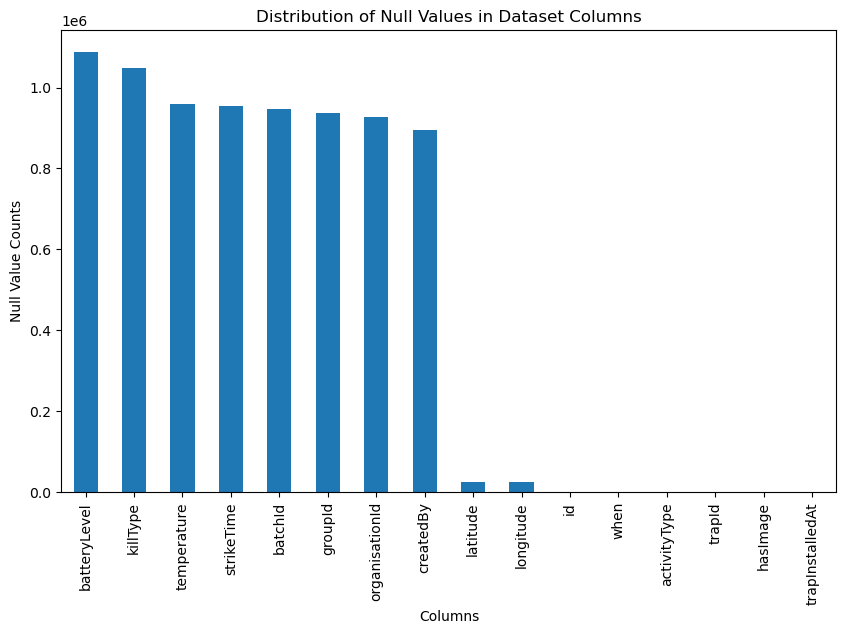

In [11]:
# Calculate the null value counts for each column
null_counts = df.isnull().sum()

# Sort the null value counts in descending order
null_counts = null_counts.sort_values(ascending=False)

# Create a bar plot of null value counts
null_counts.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.title('Distribution of Null Values in Dataset Columns')

# Show the plot
plt.show()


## Dataset filtered to new zealand

In [3]:
min_latitude  = -47.5
max_latitude  = -33.5
min_longitude = 165.
max_longitude = 179.0
# Filter the data based on the latitude and longitude boundaries
df_nz = df[(df['latitude'] >= min_latitude) &
                  (df['latitude'] <= max_latitude) &
                  (df['longitude'] >= min_longitude) &
                  (df['longitude'] <= max_longitude)]

# Print the filtered DataFrame
df_nz = df_nz.drop(['temperature', 'batchId', 'groupId', 'organisationId', 'hasImage', 'batteryLevel', 'id', 'createdBy', 'killType'], axis = 1)


In [4]:
df_nz

when      activityType              strikeTime  \
0        2018-06-17 20:12:02.455+00            SYNCED                     NaN   
1        2018-06-17 20:12:02.461+00            STRIKE  2017-04-04 06:10:20+00   
2        2018-06-17 20:12:02.461+00            STRIKE  2017-04-04 06:13:20+00   
3        2018-06-17 20:12:02.461+00            STRIKE  2017-04-04 06:08:20+00   
4        2018-06-17 20:12:02.461+00            STRIKE  2017-04-04 06:12:20+00   
...                             ...               ...                     ...   
1094470  2021-08-01 21:02:34.786+00            STRIKE  2021-07-28 10:30:03+00   
1094471  2021-08-01 21:02:34.866+00  UNCOLLECTED_DATA                     NaN   
1094472  2021-08-01 21:02:40.056+00            SYNCED                     NaN   
1094473  2021-08-01 21:02:40.056+00            SYNCED                     NaN   
1094474  2021-08-01 21:03:02.053+00            SYNCED                     NaN   

         trapId   latitude   longitude             trapInstalledAt  
0             1 -41.277712  174.780174  2018-06-17 20:12:02.157+00  
1             1 -41.277712  174.780174  2018-06-17 20:12:02.157+00  
2             1 -41.277712  174.780174  2018-06-17 20:12:02.157+00  
3             1 -41.277712  174.780174  2018-06-17 20:12:02.157+00  
4             1 -41.277712  174.780174  2018-06-17 20:12:02.157+00  
...         ...        ...         ...                         ...  
1094470   30338 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094471   30338 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094472   30338 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094473   30338 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094474    3883 -41.124433  175.070783  2019-05-07 04:56:35.146+00  

[944887 rows x 7 columns]

#### We are not concerned with data that had no strikes as it would make no sense to analyze traps that had a CO2/Lure replacement if those traps had no strikes

### removing columns whose 'when' is more recent that the strikeTime

In how many instances in the data is 'when' column values more recent than 'strikeTime' values?

This is important to know since we are looking at a monthly basis. It is better to have 'strikeTime' values that are in the same month & year as the 'when' values

The data started getting received from the year 2018, so there might not be much data about the CO2 replaced that year

In [8]:
# Calculate the percentage
percentage = (df_nz['when'] > df_nz['strikeTime']).mean() * 100

# Print the result
print(f"The percentage of cases where 'when' is higher than 'strikeTime' is: {percentage:.2f}%")


The percentage of cases where 'when' is higher than 'strikeTime' is: 12.65%


In [14]:
# Convert the 'when' and 'strikeTime' columns to datetime format
df_nz['when'] = pd.to_datetime(df_nz['when'], format = 'mixed')
df_nz['strikeTime'] = pd.to_datetime(df_nz['strikeTime'], format = 'mixed')

import numpy as np

df_nz['when_month'] = df_nz['when'].dt.month
df_nz['when_year'] = df_nz['when'].dt.year
df_nz['strike_month'] = df_nz['strikeTime'].dt.month
df_nz['strike_year'] = df_nz['strikeTime'].dt.year

# Create the 'true' column
df_nz['true'] = np.where((df_nz['when_year'] > df_nz['strike_year']) | 
                        ((df_nz['when_year'] == df_nz['strike_year']) & (df_nz['when_month'] > df_nz['strike_month'])), 
                        'Yes', 'No')
yes_count = df_nz[df_nz['true'] == 'Yes'].shape[0]
print("Total number of 'Yes' values: ", yes_count)
df_nz = df_nz[df_nz['true'] != 'Yes']


Total number of 'Yes' values:  58268


In [15]:
df_nz = df_nz.drop(['when_year', 'when_month', 'strike_year', 'strike_month', 'true'], axis = 1)
df_nz

when      activityType strikeTime  trapId  \
0       2018-06-17 20:12:02.455000+00:00            SYNCED        NaT       1   
7       2018-06-17 20:12:03.092000+00:00            SYNCED        NaT       2   
9       2018-06-17 20:12:03.728000+00:00            SYNCED        NaT       3   
11      2018-06-17 20:12:04.311000+00:00            SYNCED        NaT       4   
13      2018-06-17 20:12:04.887000+00:00            SYNCED        NaT       5   
...                                  ...               ...        ...     ...   
1094469 2021-08-01 21:02:23.826000+00:00            SYNCED        NaT   30338   
1094471 2021-08-01 21:02:34.866000+00:00  UNCOLLECTED_DATA        NaT   30338   
1094472 2021-08-01 21:02:40.056000+00:00            SYNCED        NaT   30338   
1094473 2021-08-01 21:02:40.056000+00:00            SYNCED        NaT   30338   
1094474 2021-08-01 21:03:02.053000+00:00            SYNCED        NaT    3883   

          latitude   longitude             trapInstalledAt  
0       -41.277712  174.780174  2018-06-17 20:12:02.157+00  
7       -42.590843  171.135977  2018-06-17 20:12:02.913+00  
9       -39.060976  174.069333   2018-06-17 20:12:03.57+00  
11      -39.069582  174.076963  2018-06-17 20:12:04.157+00  
13      -44.999154  168.765990   2018-06-17 20:12:04.74+00  
...            ...         ...                         ...  
1094469 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094471 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094472 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094473 -36.731976  174.689250  2021-06-20 01:41:52.175+00  
1094474 -41.124433  175.070783  2019-05-07 04:56:35.146+00  

[886619 rows x 7 columns]

### getting rid of the SYNCED column as it's not that useful

In [18]:
df_nz = df_nz[df_nz['activityType'] != 'SYNCED']
df_nz

when      activityType strikeTime  trapId  \
751     2018-06-17 20:16:15.369000+00:00           CO2_LOW        NaT     184   
825     2018-06-17 20:16:38.618000+00:00       NO_CO2_LEFT        NaT     194   
1076    2018-06-17 20:18:20.504000+00:00       NO_CO2_LEFT        NaT     234   
1139    2018-06-17 20:18:37.226000+00:00       NO_CO2_LEFT        NaT     240   
1497    2018-06-17 20:29:19.724000+00:00       NO_CO2_LEFT        NaT     307   
...                                  ...               ...        ...     ...   
1094439 2021-08-01 20:44:46.510000+00:00  UNCOLLECTED_DATA        NaT   13433   
1094446 2021-08-01 20:47:47.462000+00:00     LURE_REPLACED        NaT   19831   
1094447 2021-08-01 20:48:01.874000+00:00      CO2_REPLACED        NaT   19831   
1094456 2021-08-01 20:53:22.552000+00:00  UNCOLLECTED_DATA        NaT   30276   
1094471 2021-08-01 21:02:34.866000+00:00  UNCOLLECTED_DATA        NaT   30338   

          latitude   longitude             trapInstalledAt  
751     -41.294066  174.785289  2018-06-17 20:16:15.169+00  
825     -38.919085  175.743480  2018-06-17 20:16:38.402+00  
1076    -38.480042  175.902503   2018-06-17 20:18:20.27+00  
1139    -46.099483  169.523826   2018-06-17 20:18:37.02+00  
1497    -41.277240  174.760385   2018-06-17 20:29:19.51+00  
...            ...         ...                         ...  
1094439 -41.320503  174.790301  2020-04-26 00:48:46.186+00  
1094446 -42.899245  170.817429  2020-10-23 21:52:58.002+00  
1094447 -42.899245  170.817429  2020-10-23 21:52:58.002+00  
1094456 -36.731546  174.685668  2021-06-19 03:58:48.092+00  
1094471 -36.731976  174.689250  2021-06-20 01:41:52.175+00  

[154095 rows x 7 columns]

### new_df is colleague Anjana Ranjan's dataset which had the land use types

In [19]:
new_df = pd.read_csv('dff_lu.csv')
new_df

C:\Users\psych\AppData\Local\Temp\ipykernel_30832\1062570067.py:1: DtypeWarning: Columns (5,10,21) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('dff_lu.csv')


Unnamed: 0  trapId      id                              when  \
0                 0       1       1  2018-06-17 20:12:02.455000+00:00   
1                 1       1       4  2018-06-17 20:12:02.461000+00:00   
2                 2       1       7  2018-06-17 20:12:02.461000+00:00   
3                 3       1       2  2018-06-17 20:12:02.461000+00:00   
4                 4       1       6  2018-06-17 20:12:02.461000+00:00   
...             ...     ...     ...                               ...   
1048570     1048570   20813  818850  2021-02-09 22:10:38.917000+00:00   
1048571     1048571   20813  818850  2021-02-09 22:10:38.917000+00:00   
1048572     1048572   20813  818851  2021-02-09 22:10:54.730000+00:00   
1048573     1048573   20813  818851  2021-02-09 22:10:54.730000+00:00   
1048574     1048574   20813  818852  2021-02-09 22:10:54.793000+00:00   

             activityType                 strikeTime  batchId  createdBy  \
0                  SYNCED                        NaN      1.0        NaN   
1                  STRIKE  2017-04-04 06:10:20+00:00      1.0        2.0   
2                  STRIKE  2017-04-04 06:13:20+00:00      1.0        2.0   
3                  STRIKE  2017-04-04 06:08:20+00:00      1.0        2.0   
4                  STRIKE  2017-04-04 06:12:20+00:00      1.0        2.0   
...                   ...                        ...      ...        ...   
1048570            SYNCED                        NaN      NaN        NaN   
1048571            SYNCED                        NaN      NaN        NaN   
1048572            STRIKE  2021-01-25 03:37:05+00:00  64232.0    11022.0   
1048573            STRIKE  2021-01-25 03:37:05+00:00  64232.0    11022.0   
1048574  UNCOLLECTED_DATA                        NaN      NaN    11022.0   

         groupId  organisationId  ... batteryLevel  hasImage  \
0            NaN             NaN  ...        100.0     False   
1            NaN             NaN  ...          NaN     False   
2            NaN             NaN  ...          NaN     False   
3            NaN             NaN  ...          NaN     False   
4            NaN             NaN  ...          NaN     False   
...          ...             ...  ...          ...       ...   
1048570      NaN             NaN  ...          NaN     False   
1048571      NaN             NaN  ...          NaN     False   
1048572      NaN             NaN  ...          NaN     False   
1048573      NaN             NaN  ...          NaN     False   
1048574      NaN             NaN  ...          NaN     False   

                          trapInstalledAt      region        city  \
0        2018-06-17 20:12:02.157000+00:00  Wellington  Wellington   
1        2018-06-17 20:12:02.157000+00:00  Wellington  Wellington   
2        2018-06-17 20:12:02.157000+00:00  Wellington  Wellington   
3        2018-06-17 20:12:02.157000+00:00  Wellington  Wellington   
4        2018-06-17 20:12:02.157000+00:00  Wellington  Wellington   
...                                   ...         ...         ...   
1048570  2020-11-20 07:03:43.382000+00:00    Auckland   Pakuranga   
1048571  2020-11-20 07:03:43.382000+00:00    Auckland   Pakuranga   
1048572  2020-11-20 07:03:43.382000+00:00    Auckland   Pakuranga   
1048573  2020-11-20 07:03:43.382000+00:00    Auckland   Pakuranga   
1048574  2020-11-20 07:03:43.382000+00:00    Auckland   Pakuranga   

                                   landUse                trapInstalledAt_NZ  \
0        81 - Settlements or built-up area  2018-06-18 08:12:02.157000+12:00   
1        81 - Settlements or built-up area  2018-06-18 08:12:02.157000+12:00   
2        81 - Settlements or built-up area  2018-06-18 08:12:02.157000+12:00   
3        81 - Settlements or built-up area  2018-06-18 08:12:02.157000+12:00   
4        81 - Settlements or built-up area  2018-06-18 08:12:02.157000+12:00   
...                                    ...                               ...   
1048570                                NaN  2020-11-20 20:03:

In [20]:
new_df = new_df.drop(['id', 'batchId', 'Unnamed: 0', 'createdBy', 'groupId', 'organisationId', 'killType', 'temperature', 'batteryLevel', 'hasImage', 'trapInstalledAt', 'trapInstalledAt_NZ', 'strikeTime_NZ', 'when_NZ', 'landUseCode'], axis = 1)

### making land use types more readable and structured

In [21]:
new_df['landUse'] = new_df['landUse'].str.replace(r'^\d+\s-\s', '', regex=True)

In [22]:
new_df

trapId                              when      activityType  \
0             1  2018-06-17 20:12:02.455000+00:00            SYNCED   
1             1  2018-06-17 20:12:02.461000+00:00            STRIKE   
2             1  2018-06-17 20:12:02.461000+00:00            STRIKE   
3             1  2018-06-17 20:12:02.461000+00:00            STRIKE   
4             1  2018-06-17 20:12:02.461000+00:00            STRIKE   
...         ...                               ...               ...   
1048570   20813  2021-02-09 22:10:38.917000+00:00            SYNCED   
1048571   20813  2021-02-09 22:10:38.917000+00:00            SYNCED   
1048572   20813  2021-02-09 22:10:54.730000+00:00            STRIKE   
1048573   20813  2021-02-09 22:10:54.730000+00:00            STRIKE   
1048574   20813  2021-02-09 22:10:54.793000+00:00  UNCOLLECTED_DATA   

                        strikeTime   latitude   longitude      region  \
0                              NaN -41.277712  174.780174  Wellington   
1        2017-04-04 06:10:20+00:00 -41.277712  174.780174  Wellington   
2        2017-04-04 06:13:20+00:00 -41.277712  174.780174  Wellington   
3        2017-04-04 06:08:20+00:00 -41.277712  174.780174  Wellington   
4        2017-04-04 06:12:20+00:00 -41.277712  174.780174  Wellington   
...                            ...        ...         ...         ...   
1048570                        NaN -36.776590  174.987743    Auckland   
1048571                        NaN -36.776590  174.987743    Auckland   
1048572  2021-01-25 03:37:05+00:00 -36.776590  174.987743    Auckland   
1048573  2021-01-25 03:37:05+00:00 -36.776590  174.987743    Auckland   
1048574                        NaN -36.776590  174.987743    Auckland   

               city                       landUse  
0        Wellington  Settlements or built-up area  
1        Wellington  Settlements or built-up area  
2        Wellington  Settlements or built-up area  
3        Wellington  Settlements or built-up area  
4        Wellington  Settlements or built-up area  
...             ...                           ...  
1048570   Pakuranga                           NaN  
1048571   Pakuranga     Grassland - Low producing  
1048572   Pakuranga                           NaN  
1048573   Pakuranga     Grassland - Low producing  
1048574   Pakuranga                           NaN  

[1048575 rows x 9 columns]

In [23]:
# Replace values containing 'Grassland' with 'Grassland'
new_df['landUse'] = new_df['landUse'].str.replace('.*Grassland.*', 'Grassland', regex=True)

# Replace values containing 'Forest' with 'Forest'
new_df['landUse'] = new_df['landUse'].str.replace('.*Forest.*', 'Forest', regex=True)

new_df['landUse'] = new_df['landUse'].str.replace('.*Cropland.*', 'Cropland', regex=True)

In [ ]:
# Select the 'trapId' and 'landUse' columns from the 'new_df' DataFrame and drop duplicates
unique_trapids_landuse = new_df[['trapId', 'landUse']].drop_duplicates(subset=['trapId', 'landUse'])

# Drop rows with NaN values in the 'landUse' column
unique_trapids_landuse = unique_trapids_landuse.dropna(subset=['landUse'])

# Display the new DataFrame
unique_trapids_landuse['trapId'].nunique()
unique_trapids_landuse

trapId                       landUse
0             1  Settlements or built-up area
10            2                     Grassland
15            3  Settlements or built-up area
20            4  Settlements or built-up area
25            5                     Grassland
...         ...                           ...
1048229   20804                     Grassland
1048249   20805  Settlements or built-up area
1048351   20806                     Grassland
1048397   20807                     Grassland
1048509   20813                     Grassland

[9993 rows x 2 columns]

In [ ]:
df_nz['trapId'].nunique()

19314

### Merging the landUse type for each trapId correspondingly

In [26]:
# Merge the 'landUse' column from unique_trapids_landuse with the df_nz dataset
df_nz = df_nz.merge(unique_trapids_landuse[['trapId', 'landUse']], on='trapId', how = 'left')
df_nz

when      activityType strikeTime  trapId  \
0      2018-06-17 20:16:15.369000+00:00           CO2_LOW        NaT     184   
1      2018-06-17 20:16:38.618000+00:00       NO_CO2_LEFT        NaT     194   
2      2018-06-17 20:18:20.504000+00:00       NO_CO2_LEFT        NaT     234   
3      2018-06-17 20:18:37.226000+00:00       NO_CO2_LEFT        NaT     240   
4      2018-06-17 20:29:19.724000+00:00       NO_CO2_LEFT        NaT     307   
...                                 ...               ...        ...     ...   
154090 2021-08-01 20:44:46.510000+00:00  UNCOLLECTED_DATA        NaT   13433   
154091 2021-08-01 20:47:47.462000+00:00     LURE_REPLACED        NaT   19831   
154092 2021-08-01 20:48:01.874000+00:00      CO2_REPLACED        NaT   19831   
154093 2021-08-01 20:53:22.552000+00:00  UNCOLLECTED_DATA        NaT   30276   
154094 2021-08-01 21:02:34.866000+00:00  UNCOLLECTED_DATA        NaT   30338   

         latitude   longitude             trapInstalledAt  \
0      -41.294066  174.785289  2018-06-17 20:16:15.169+00   
1      -38.919085  175.743480  2018-06-17 20:16:38.402+00   
2      -38.480042  175.902503   2018-06-17 20:18:20.27+00   
3      -46.099483  169.523826   2018-06-17 20:18:37.02+00   
4      -41.277240  174.760385   2018-06-17 20:29:19.51+00   
...           ...         ...                         ...   
154090 -41.320503  174.790301  2020-04-26 00:48:46.186+00   
154091 -42.899245  170.817429  2020-10-23 21:52:58.002+00   
154092 -42.899245  170.817429  2020-10-23 21:52:58.002+00   
154093 -36.731546  174.685668  2021-06-19 03:58:48.092+00   
154094 -36.731976  174.689250  2021-06-20 01:41:52.175+00   

                             landUse  
0       Settlements or built-up area  
1                             Forest  
2                          Grassland  
3                          Grassland  
4       Settlements or built-up area  
...                              ...  
154090  Settlements or built-up area  
154091                           NaN  
154092                           NaN  
154093                           NaN  
154094                           NaN  

[154095 rows x 8 columns]

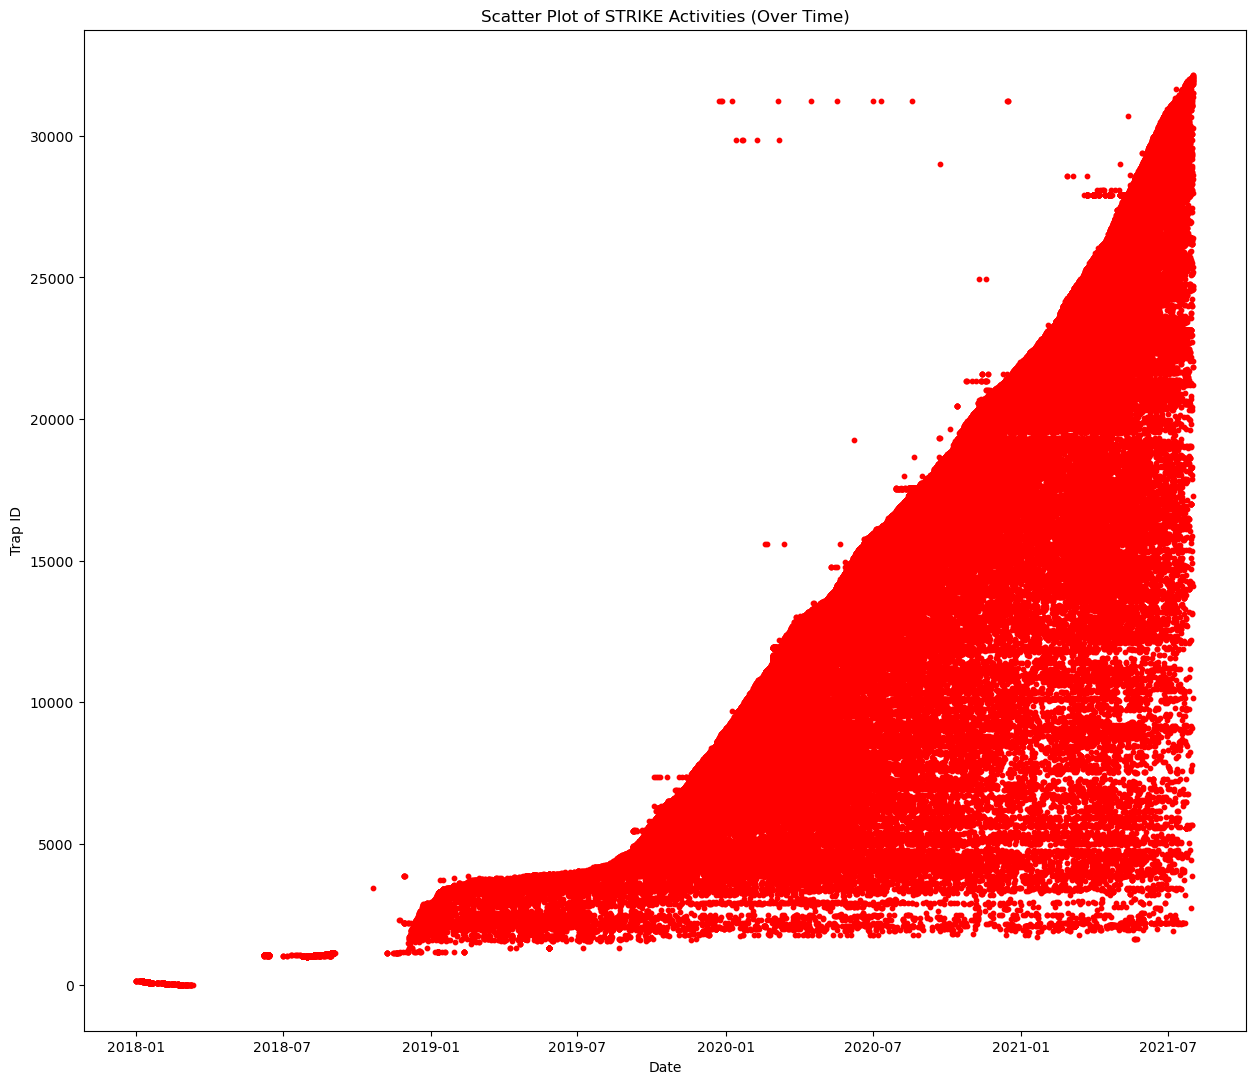

In [91]:
# Filter the dataset for years 2019-2021 and activityType 'STRIKE'
df_strikes = df[(df['strikeTime'].dt.year >= 2018) & (df['strikeTime'].dt.year <= 2021) & (df['activityType'] == 'STRIKE')]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the scatter plot
plt.scatter(df_strikes['strikeTime'], df_strikes['trapId'], c='red', s=10)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Scatter Plot of STRIKE Activities (Over Time)')

# Display the plot
plt.show()


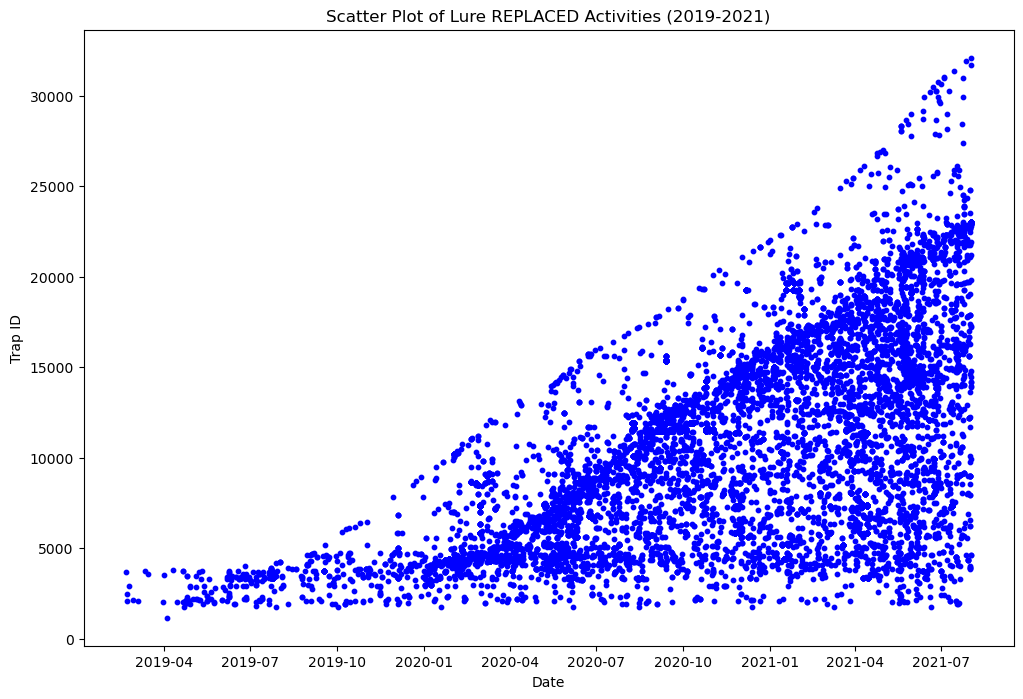

In [183]:
# Filter the dataset for years 2019-2021 and activityType 'STRIKE'
df_co2rep = df_nz[(df_nz['when'].dt.year >= 2019) & (df_nz['when'].dt.year <= 2021) & (df_nz['activityType'] == 'LURE_REPLACED')]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
plt.scatter(df_co2rep['when'], df_co2rep['trapId'], c='BLUE', s=10)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Scatter Plot of Lure REPLACED Activities (2019-2021)')

# Display the plot
plt.show()


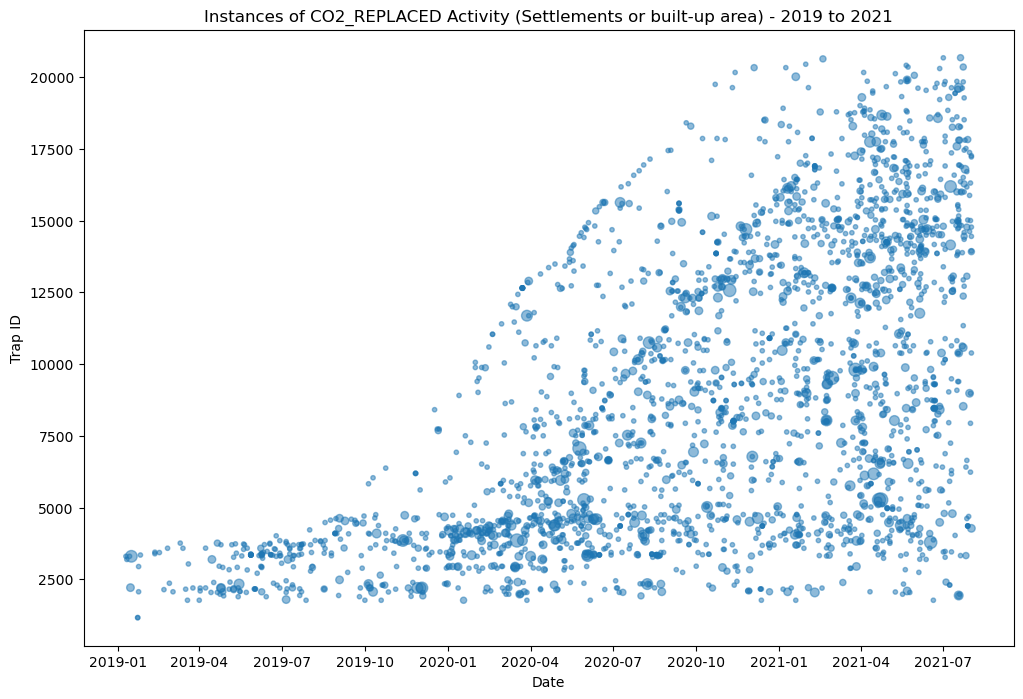

In [24]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Settlements or built-up area') & (df_nz['activityType'] == 'CO2_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with increased dot size
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of CO2_REPLACED Activity (Settlements or built-up area) - 2019 to 2021')

# Display the plot
plt.show()


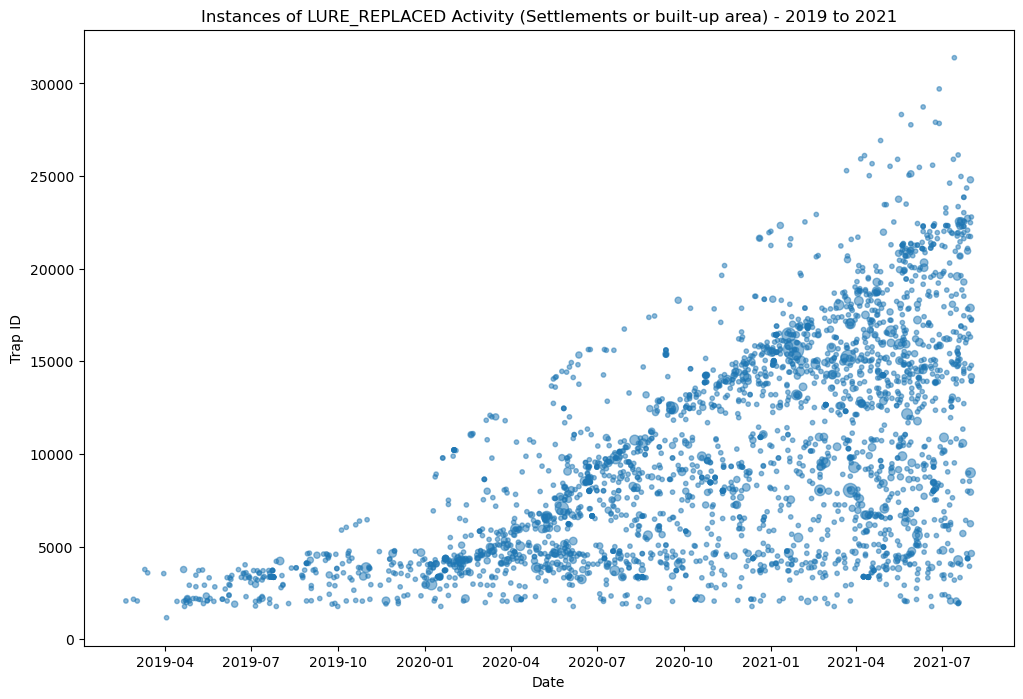

In [128]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Settlements or built-up area') & (df_nz['activityType'] == 'LURE_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with increased dot size
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of LURE_REPLACED Activity (Settlements or built-up area) - 2019 to 2021')

# Display the plot
plt.show()


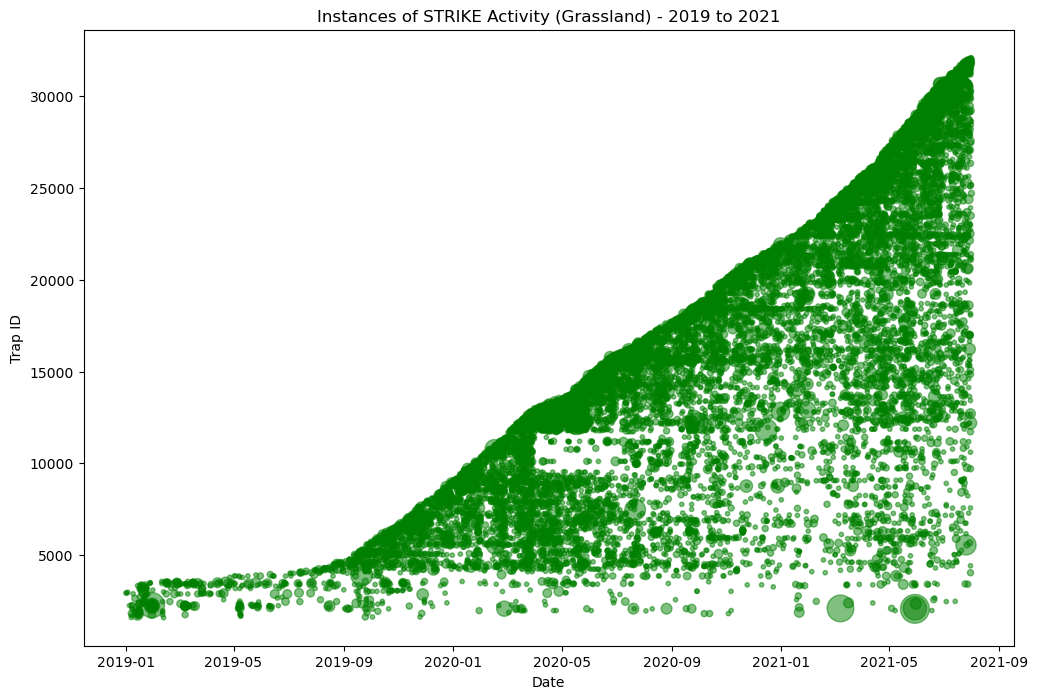

In [328]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Grassland') & (df_nz['activityType'] == 'STRIKE')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='green')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of STRIKE Activity (Grassland) - 2019 to 2021')

# Display the plot
plt.show()


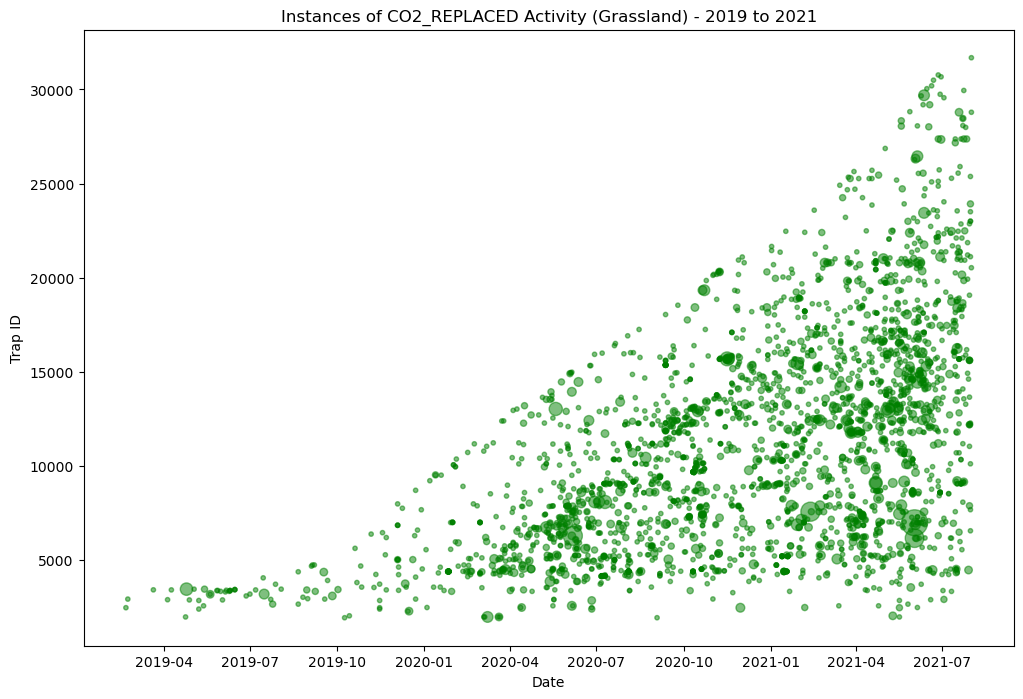

In [125]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Grassland') & (df_nz['activityType'] == 'CO2_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='green')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of CO2_REPLACED Activity (Grassland) - 2019 to 2021')

# Display the plot
plt.show()


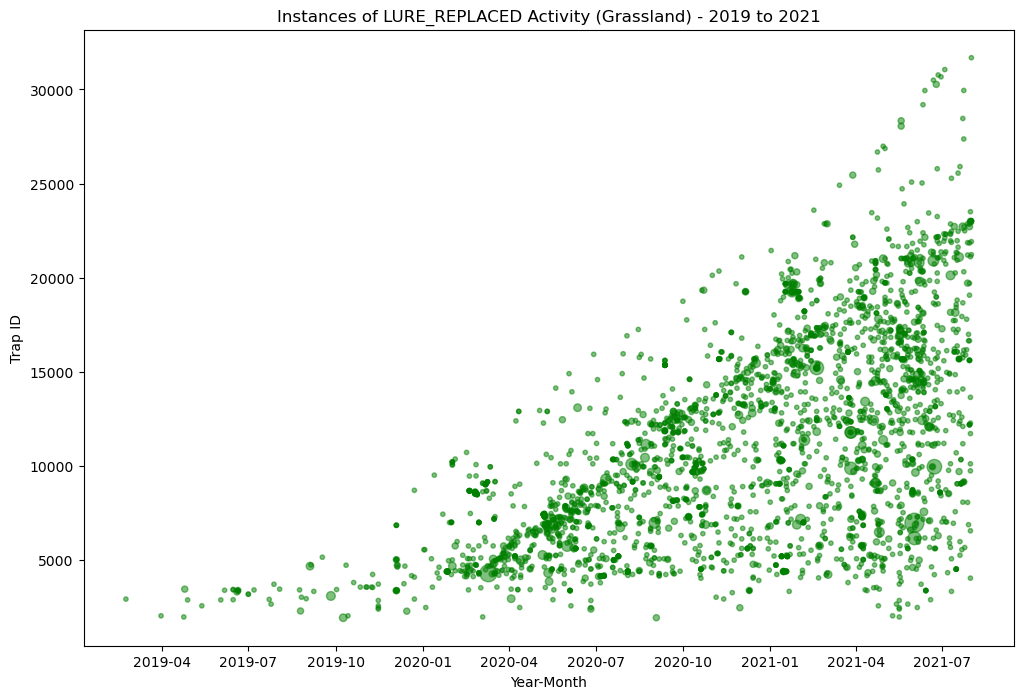

In [117]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Grassland') & (df_nz['activityType'] == 'LURE_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='green')

# Set the labels and title
plt.xlabel('Year-Month')
plt.ylabel('Trap ID')
plt.title('Instances of LURE_REPLACED Activity (Grassland) - 2019 to 2021')

# Display the plot
plt.show()


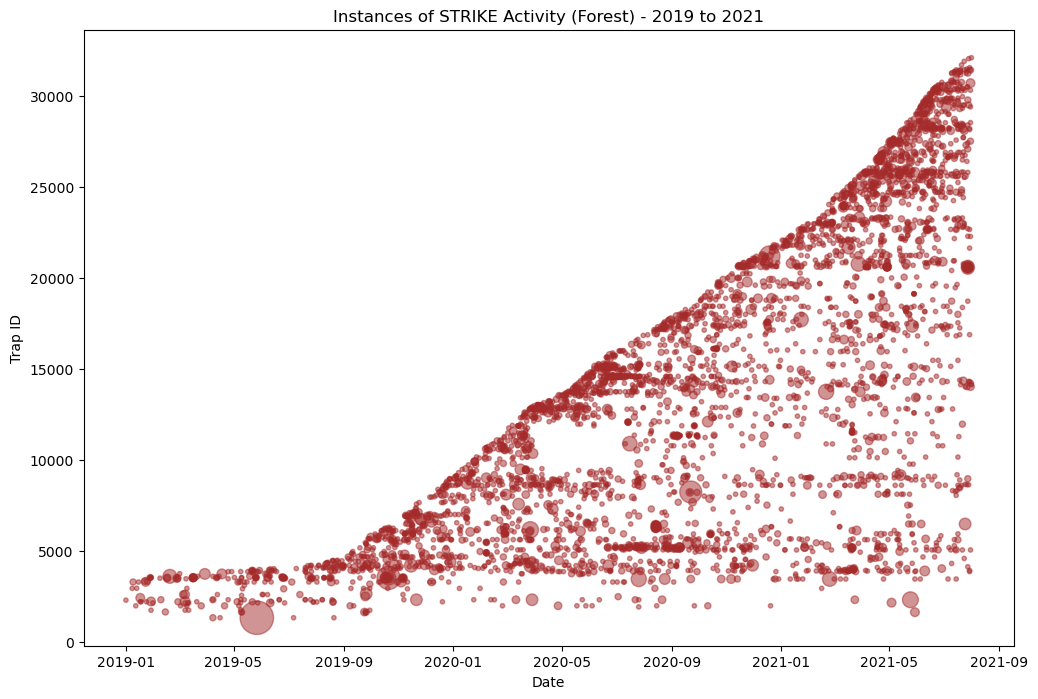

In [330]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Forest') & (df_nz['activityType'] == 'STRIKE')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='brown')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of STRIKE Activity (Forest) - 2019 to 2021')

# Display the plot
plt.show()


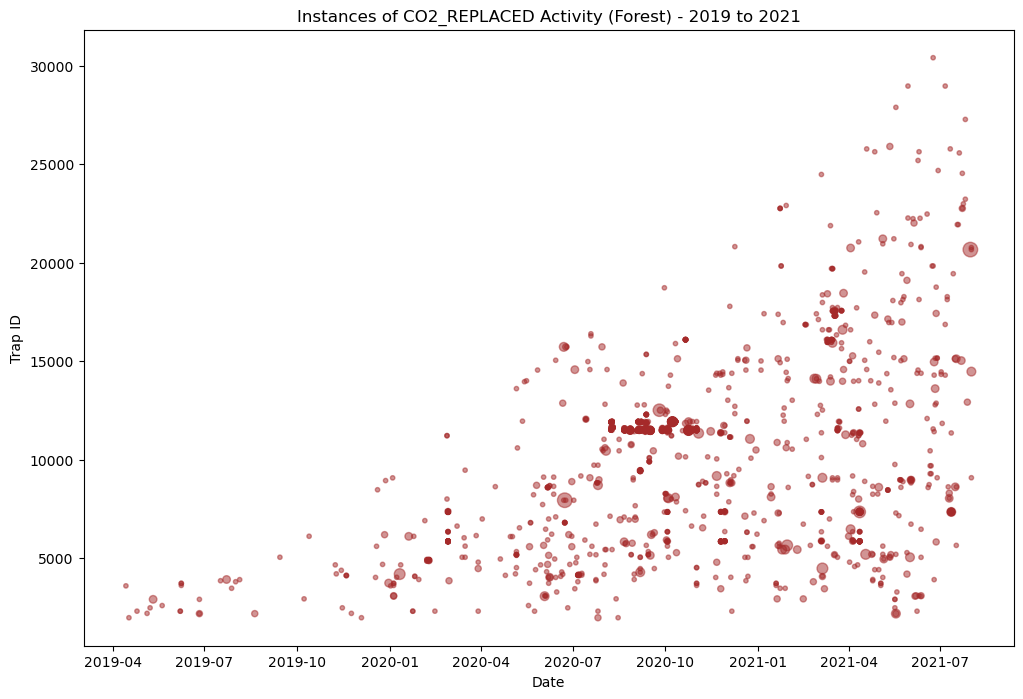

In [331]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Forest') & (df_nz['activityType'] == 'CO2_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='brown')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of CO2_REPLACED Activity (Forest) - 2019 to 2021')

# Display the plot
plt.show()


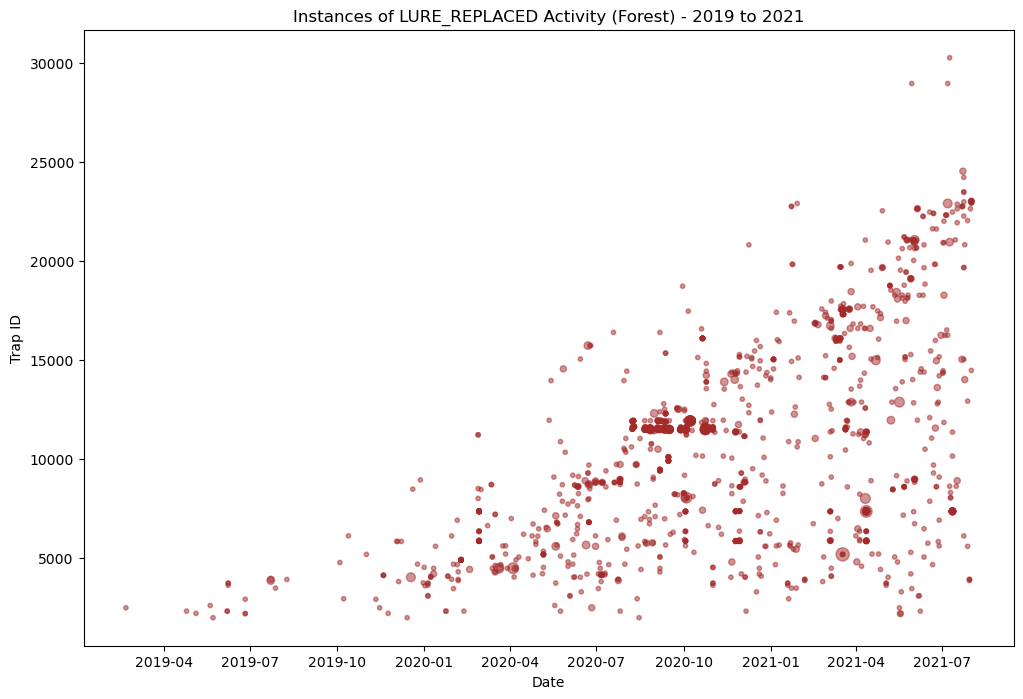

In [335]:
# Filter the dataset for the specified landUse and activityType
filtered_df = df_nz[(df_nz['landUse'] == 'Forest') & (df_nz['activityType'] == 'LURE_REPLACED')]

# Filter the dataset for the years 2019 to 2021
df_2019_2021 = filtered_df[filtered_df['when'].dt.year.between(2019, 2021)]

# Group the data by trapId and date, and count the instances per trapId and date
daily_counts = df_2019_2021.groupby([df_2019_2021['when'].dt.date, df_2019_2021['trapId']]).size()

# Get the unique dates and trapIds
dates = daily_counts.index.get_level_values(0).unique()
trap_ids = daily_counts.index.get_level_values(1).unique()

# Create a grid of dates and trapIds
grid = pd.MultiIndex.from_product([dates, trap_ids], names=['date', 'trapId'])

# Fill missing values with 0
daily_counts = daily_counts.reindex(grid, fill_value=0)

# Reset the index by creating a DataFrame
daily_counts = daily_counts.reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot with green dots
plt.scatter(daily_counts['date'], daily_counts['trapId'], s=daily_counts[0] * 10, alpha=0.5, color='brown')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Instances of LURE_REPLACED Activity (Forest) - 2019 to 2021')

# Display the plot
plt.show()


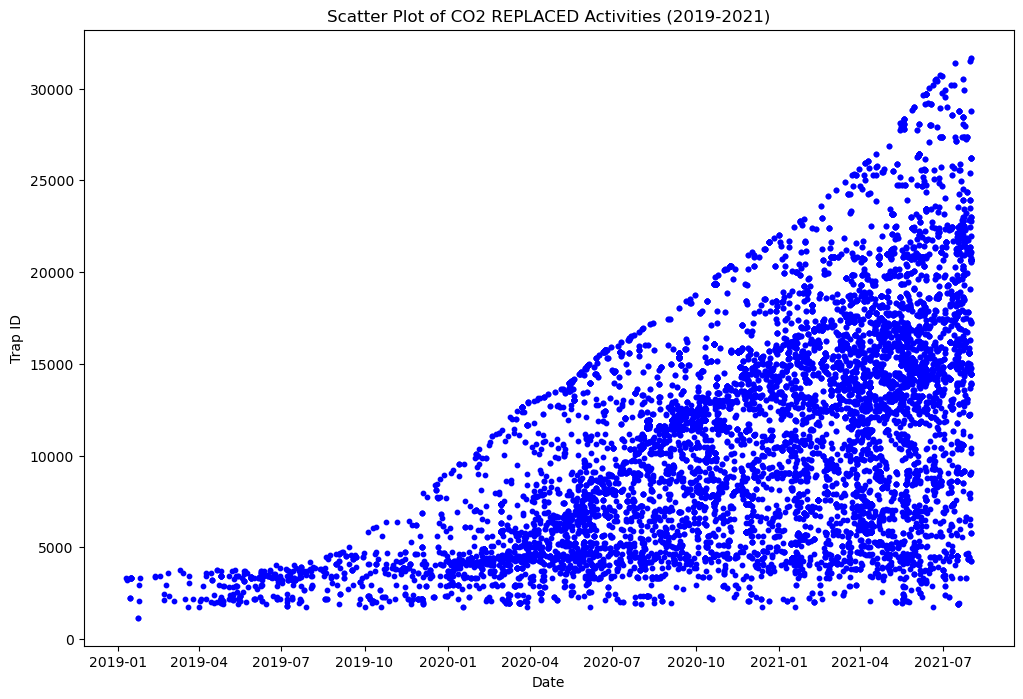

In [163]:
# Filter the dataset for years 2019-2021 and activityType 'STRIKE'
df_co2rep = new_df[(new_df['when'].dt.year >= 2019) & (new_df['when'].dt.year <= 2021) & (new_df['activityType'] == 'CO2_REPLACED')]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
plt.scatter(df_co2rep['when'], df_co2rep['trapId'], c='BLUE', s=10)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Scatter Plot of CO2 REPLACED Activities (2019-2021)')

# Display the plot
plt.show()


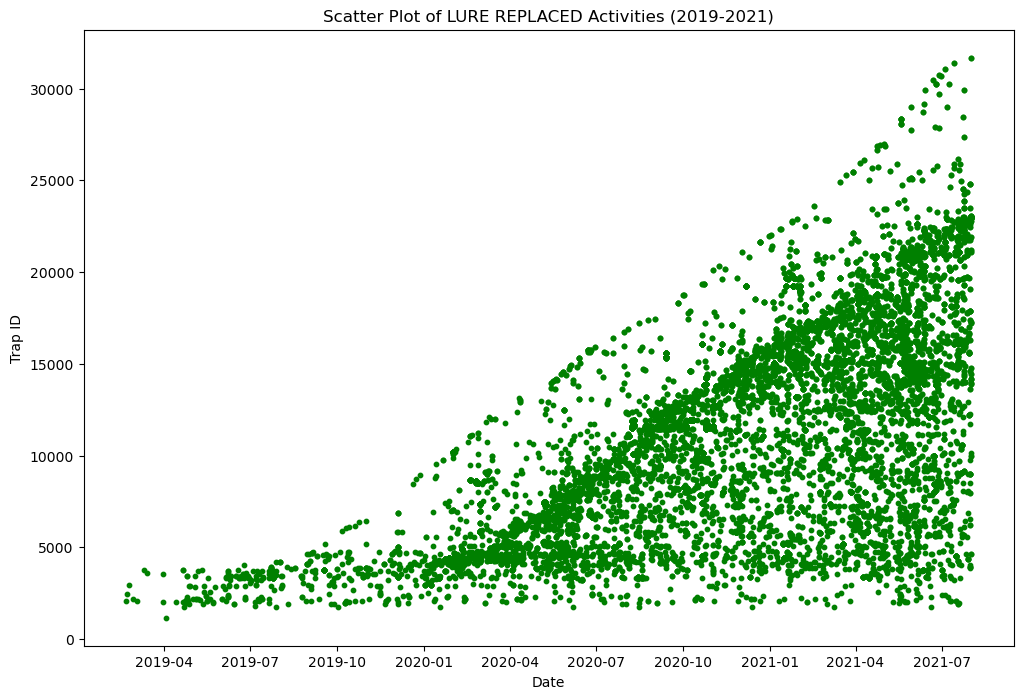

In [166]:
# Filter the dataset for years 2019-2021 and activityType 'STRIKE'
df_co2rep = new_df[(new_df['when'].dt.year >= 2019) & (new_df['when'].dt.year <= 2021) & (new_df['activityType'] == 'LURE_REPLACED')]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the scatter plot
plt.scatter(df_co2rep['when'], df_co2rep['trapId'], c='GREEN', s=10)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Trap ID')
plt.title('Scatter Plot of LURE REPLACED Activities (2019-2021)')

# Display the plot
plt.show()


### Coding the distribution of strikes per trap on January, 2019

In [33]:
# Filter the data for January 2019 and land use "Forest"
df_jan_2019_forest = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['when'].dt.month == 1) & (df_nz['landUse'] == 'Forest')]

# Filter the data for STRIKE activity
df_strikes = df_jan_2019_forest[df_jan_2019_forest['activityType'] == 'STRIKE']

# Group the data by trapId and count the occurrences of strikes
grouped = df_strikes.groupby('trapId').size().reset_index(name='strike_count')

# Sort the data by strike_count in descending order
grouped = grouped.sort_values('strike_count', ascending=False)

# Reset the index to get the desired numbering
grouped = grouped.reset_index(drop=True)

# Print the result
print(grouped)


    trapId  strike_count
0     3313             4
1     2205             4
2     2402             4
3     3283             4
4     2188             3
5     3516             2
6     3274             2
7     1726             1
8     3524             1
9     3518             1
10    3509             1
11    3500             1
12    3273             1
13    1967             1
14    2932             1
15    2927             1
16    2278             1
17    2127             1
18    3525             1


### Plotting the distribution of strikes belonging to what percentage of traps per month per land use type

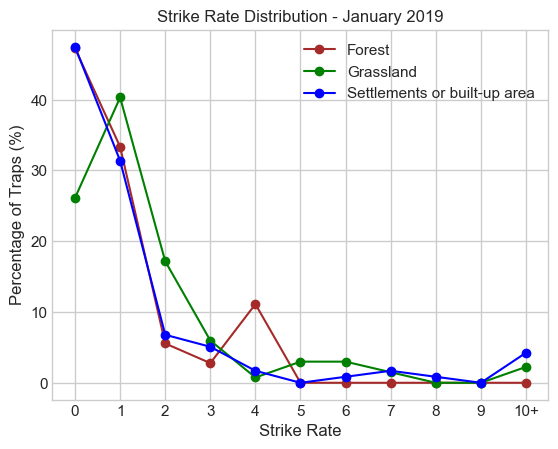

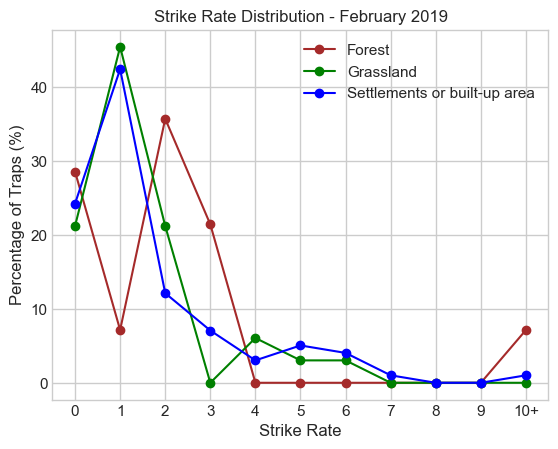

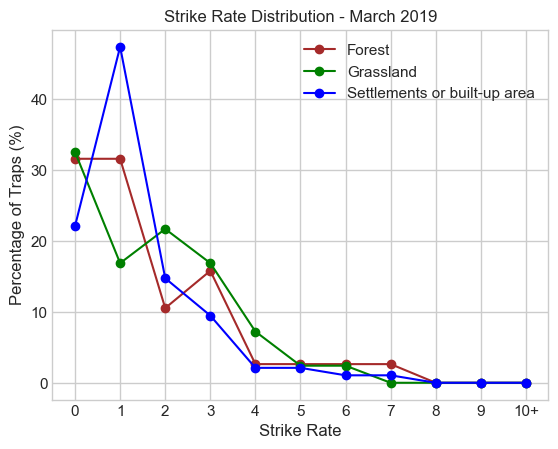

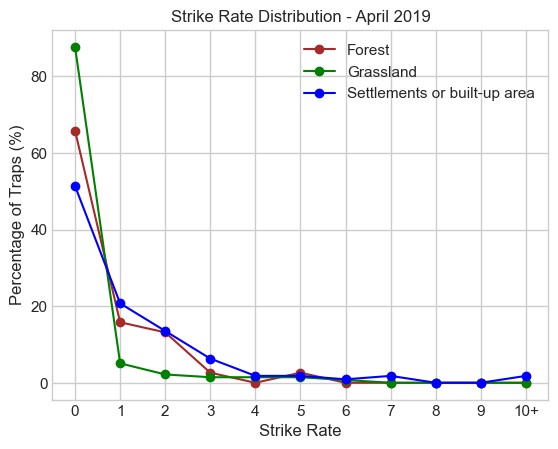

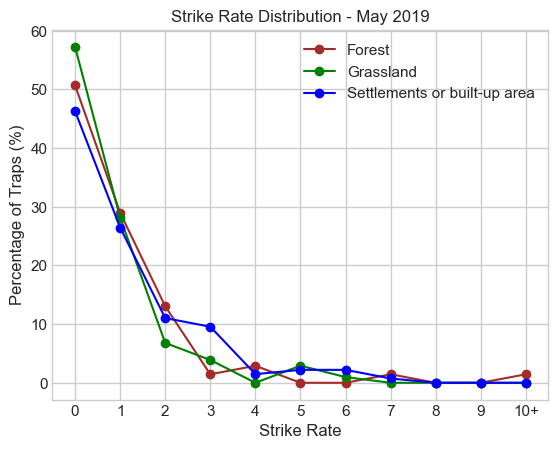

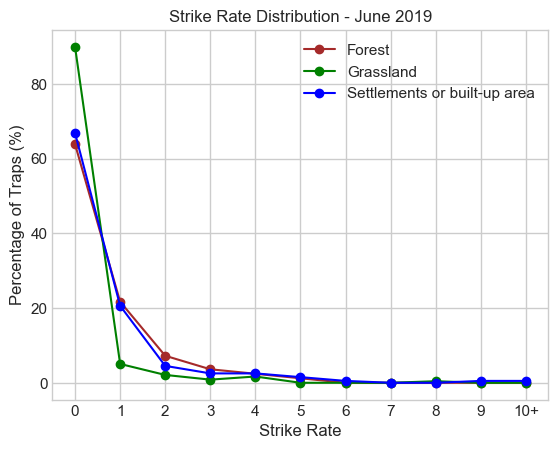

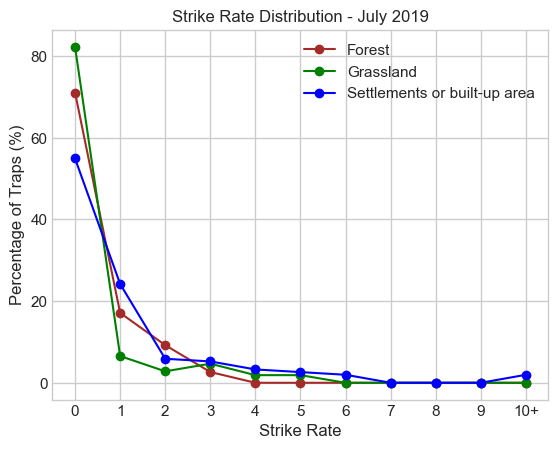

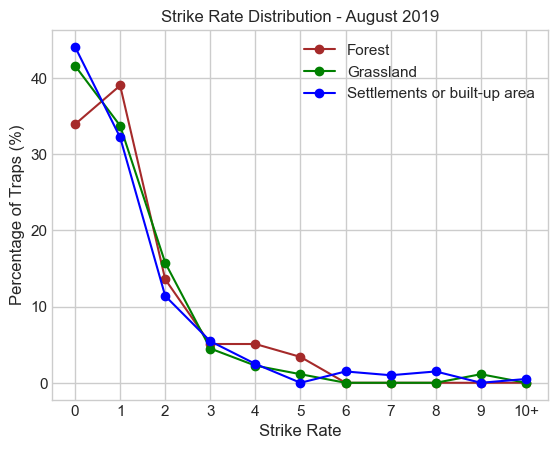

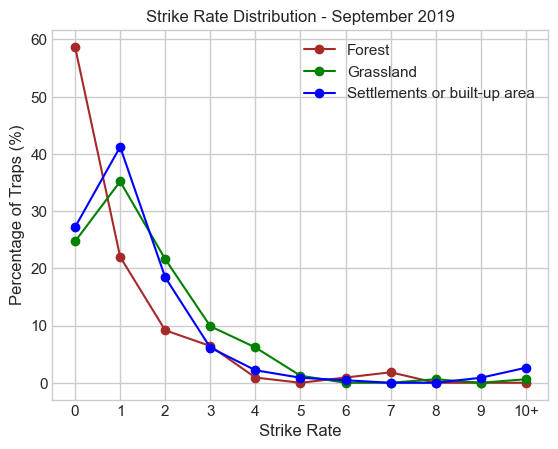

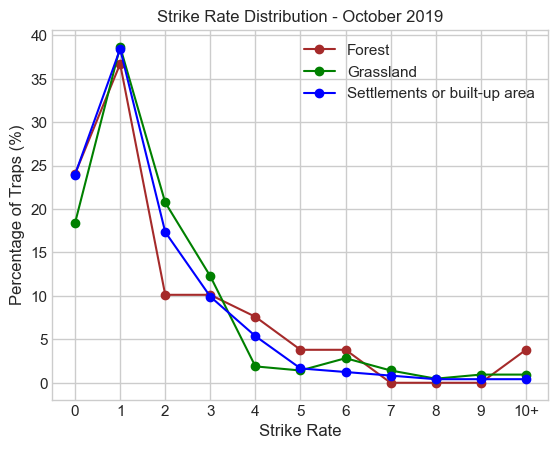

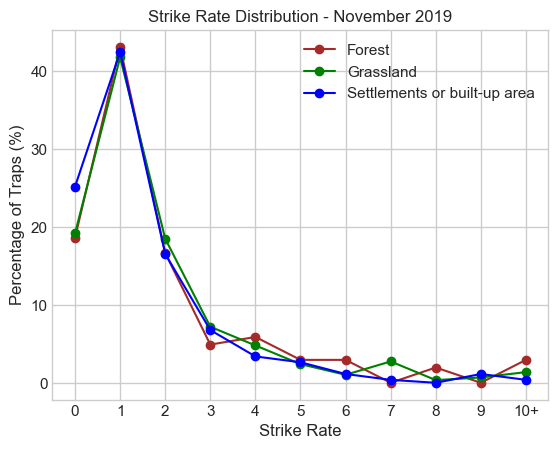

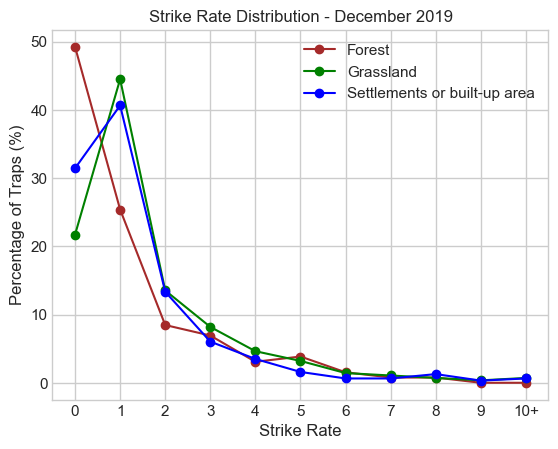

In [86]:
import calendar

# Define the landUse types and corresponding colors
land_use_types = ['Forest', 'Grassland', 'Settlements or built-up area']
colors = ['brown', 'green', 'blue']

# Iterate over each month in 2019
for month in range(1, 13):
    # Filter the data for the specific month and landUse types
    df_month = df_nz[
        (df_nz['when'].dt.year == 2019)
        & (df_nz['when'].dt.month == month)
        & (df_nz['landUse'].isin(land_use_types))
    ]
    
    # Calculate the strike rate distribution for each landUse type
    strike_distribution = {land_use: {i: 0 for i in range(11)} for land_use in land_use_types}
    total_traps = {land_use: 0 for land_use in land_use_types}
    
    # Count the number of traps for each strike rate and landUse type
    for land_use, group in df_month.groupby('landUse'):
        total_traps[land_use] = len(group['trapId'].unique())
        for trap_id, trap_group in group.groupby('trapId'):
            strike_count = trap_group[trap_group['activityType'] == 'STRIKE'].shape[0]
            strike_distribution[land_use][min(strike_count, 10)] += 1
    
    # Calculate the percentage of traps for each strike rate and landUse type
    strike_percentages = {
        land_use: [count / total_traps[land_use] * 100 if total_traps[land_use] > 0 else 0 for count in strike_distribution[land_use].values()]
        for land_use in land_use_types
    }
    
    # Combine the counts for strike rate 10 and above
    for land_use in strike_percentages:
        strike_percentages[land_use][-1] = sum(strike_percentages[land_use][10:])
        strike_percentages[land_use] = strike_percentages[land_use][:11]
    
    # Prepare the data for plotting
    x = list(range(11))
    x_labels = [str(i) for i in x[:-1]] + ['10+']
    
    # Plot the line chart for each landUse type with corresponding color
    for i, land_use in enumerate(strike_percentages):
        y = strike_percentages[land_use]
        plt.plot(x, y, marker='o', label=land_use, color=colors[i])
    
    # Add labels and title
    plt.xlabel('Strike Rate')
    plt.ylabel('Percentage of Traps (%)')
    month_name = calendar.month_name[month]
    plt.title(f'Strike Rate Distribution - {month_name} 2019')
    
    # Add a legend
    plt.legend()
    
    # Set x-axis tick labels
    plt.xticks(x, x_labels)
    
    # Show the plot
    plt.show()


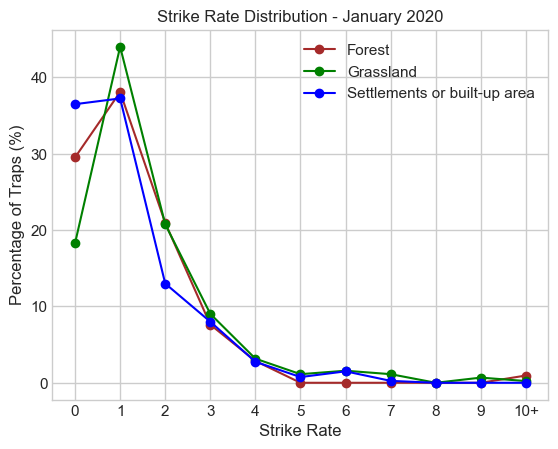

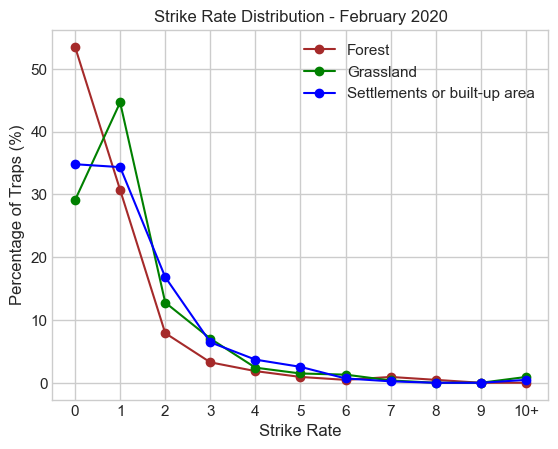

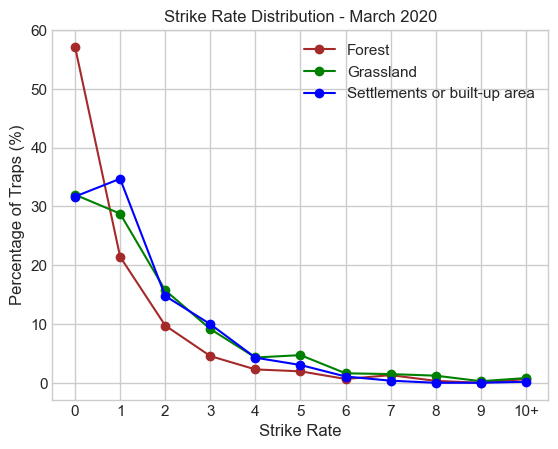

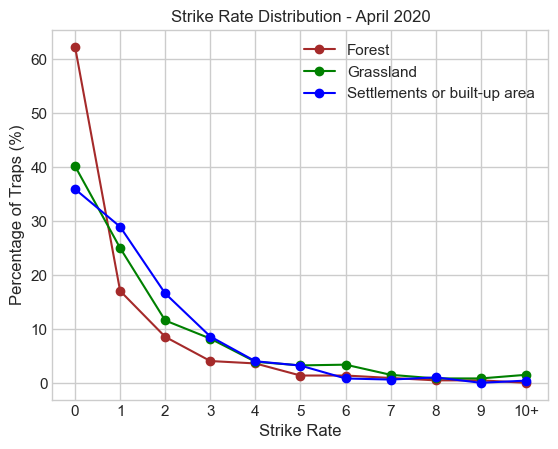

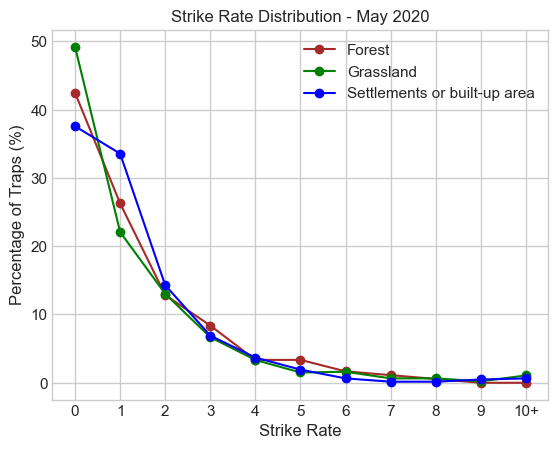

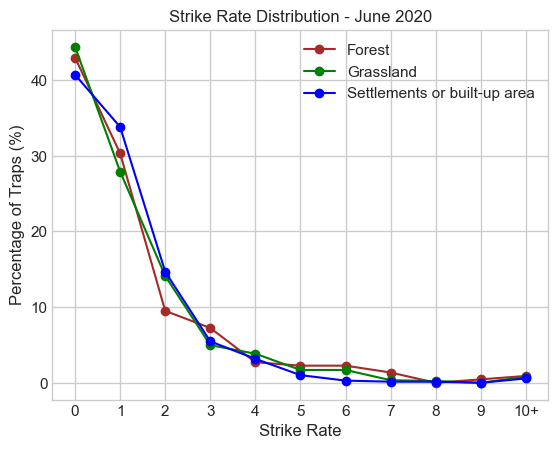

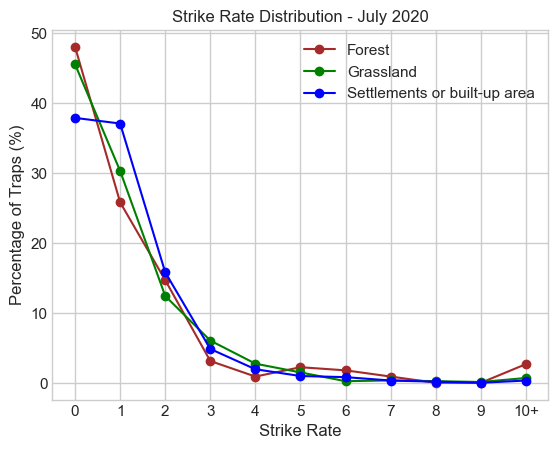

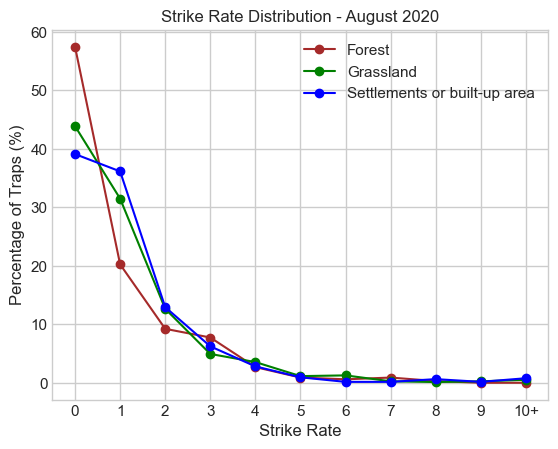

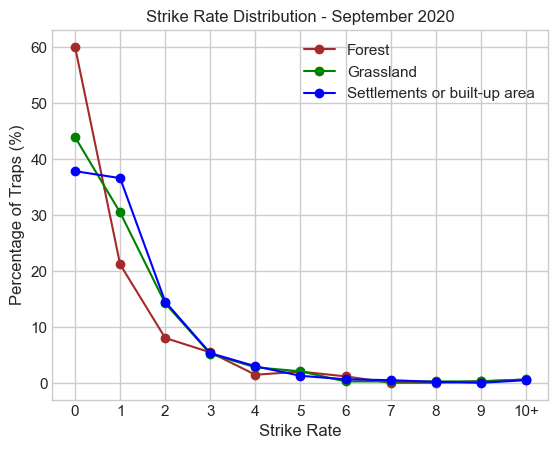

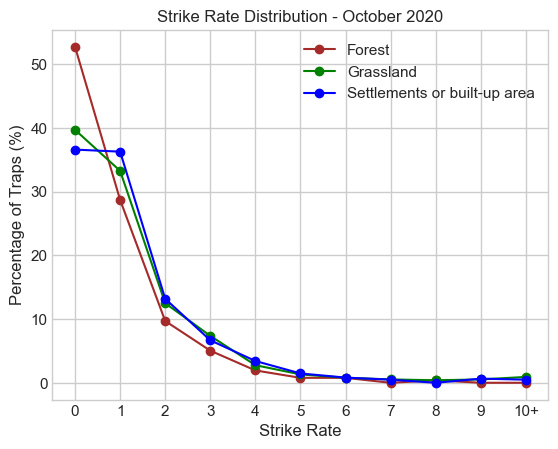

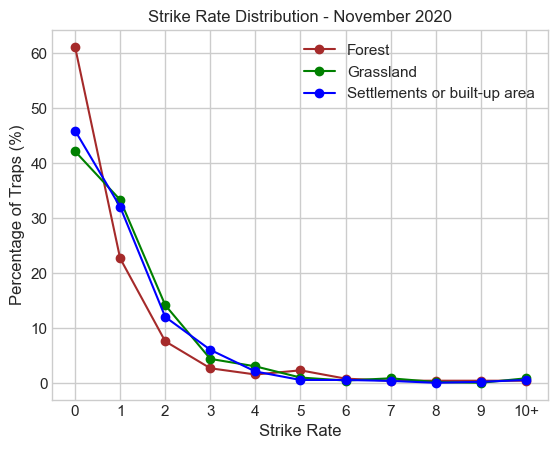

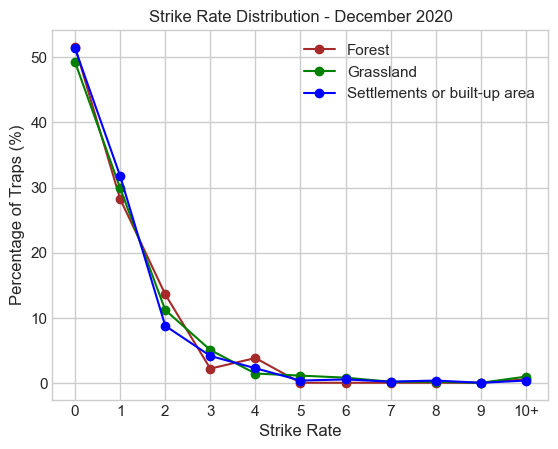

In [87]:
# Define the landUse types and corresponding colors
land_use_types = ['Forest', 'Grassland', 'Settlements or built-up area']
colors = ['brown', 'green', 'blue']

# Iterate over each month in 2019
for month in range(1, 13):
    # Filter the data for the specific month and landUse types
    df_month = df_nz[
        (df_nz['when'].dt.year == 2020)
        & (df_nz['when'].dt.month == month)
        & (df_nz['landUse'].isin(land_use_types))
    ]
    
    # Calculate the strike rate distribution for each landUse type
    strike_distribution = {land_use: {i: 0 for i in range(11)} for land_use in land_use_types}
    total_traps = {land_use: 0 for land_use in land_use_types}
    
    # Count the number of traps for each strike rate and landUse type
    for land_use, group in df_month.groupby('landUse'):
        total_traps[land_use] = len(group['trapId'].unique())
        for trap_id, trap_group in group.groupby('trapId'):
            strike_count = trap_group[trap_group['activityType'] == 'STRIKE'].shape[0]
            strike_distribution[land_use][min(strike_count, 10)] += 1
    
    # Calculate the percentage of traps for each strike rate and landUse type
    strike_percentages = {
        land_use: [count / total_traps[land_use] * 100 if total_traps[land_use] > 0 else 0 for count in strike_distribution[land_use].values()]
        for land_use in land_use_types
    }
    
    # Combine the counts for strike rate 10 and above
    for land_use in strike_percentages:
        strike_percentages[land_use][-1] = sum(strike_percentages[land_use][10:])
        strike_percentages[land_use] = strike_percentages[land_use][:11]
    
    # Prepare the data for plotting
    x = list(range(11))
    x_labels = [str(i) for i in x[:-1]] + ['10+']
    
    # Plot the line chart for each landUse type with corresponding color
    for i, land_use in enumerate(strike_percentages):
        y = strike_percentages[land_use]
        plt.plot(x, y, marker='o', label=land_use, color=colors[i])
    
    # Add labels and title
    plt.xlabel('Strike Rate')
    plt.ylabel('Percentage of Traps (%)')
    month_name = calendar.month_name[month]
    plt.title(f'Strike Rate Distribution - {month_name} 2020')
    
    # Add a legend
    plt.legend()
    
    # Set x-axis tick labels
    plt.xticks(x, x_labels)
    
    # Show the plot
    plt.show()


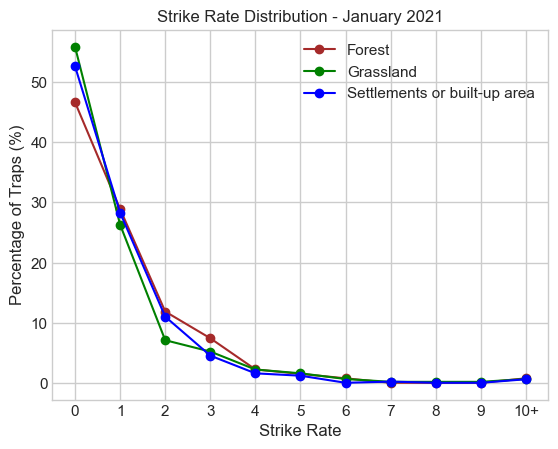

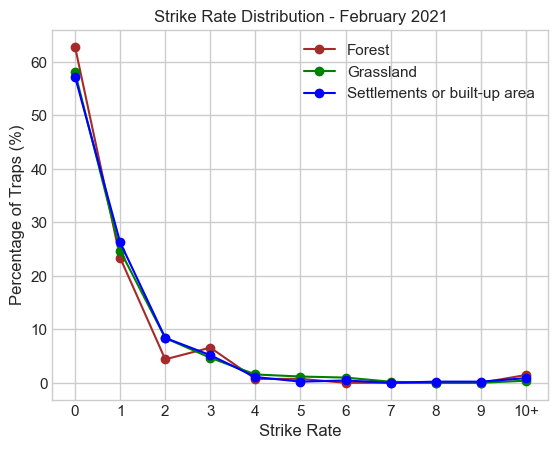

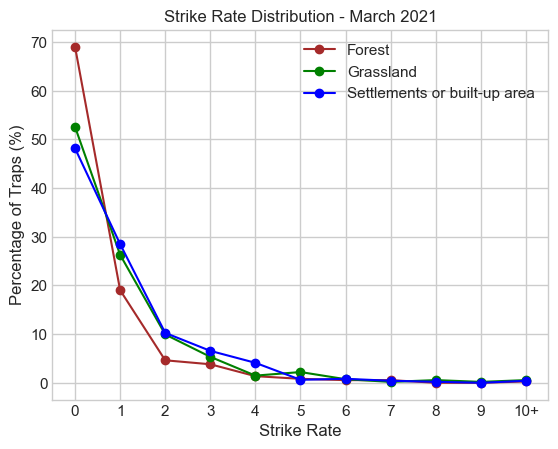

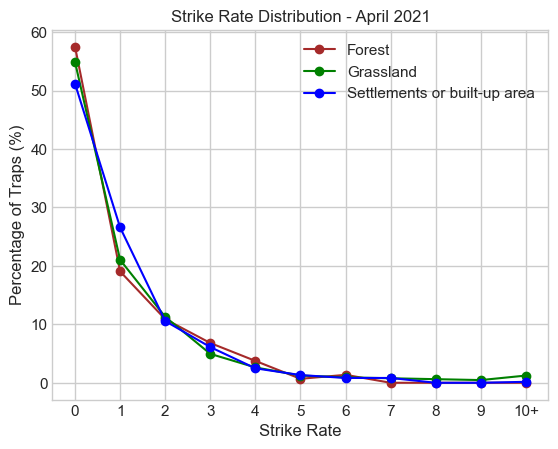

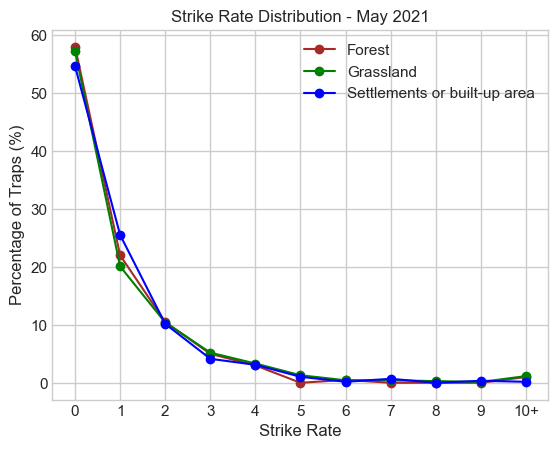

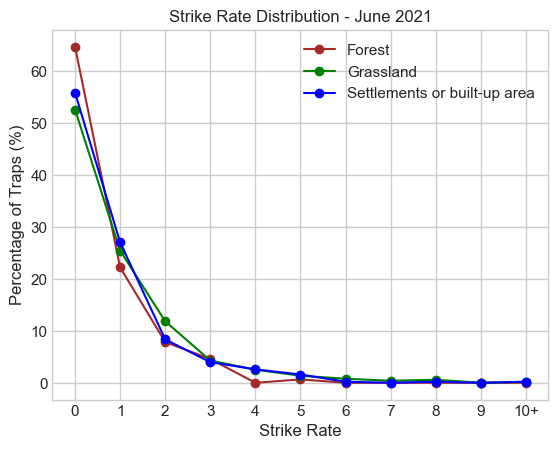

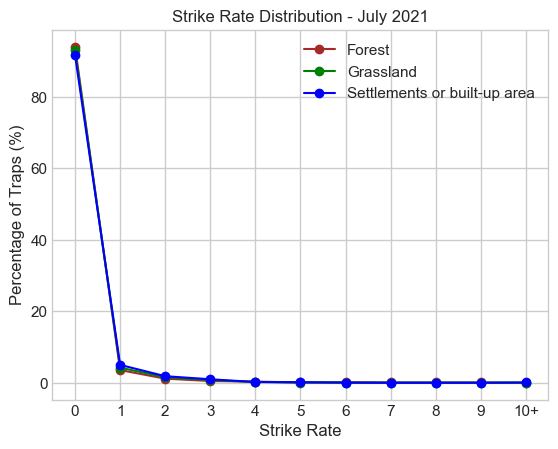

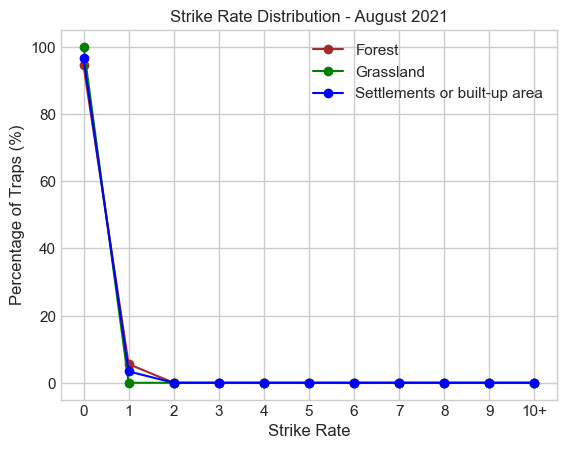

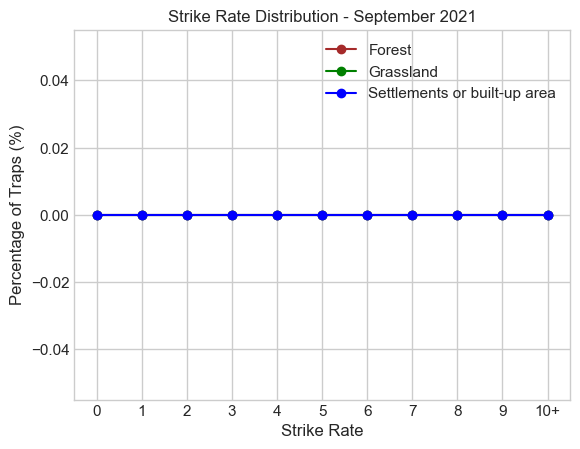

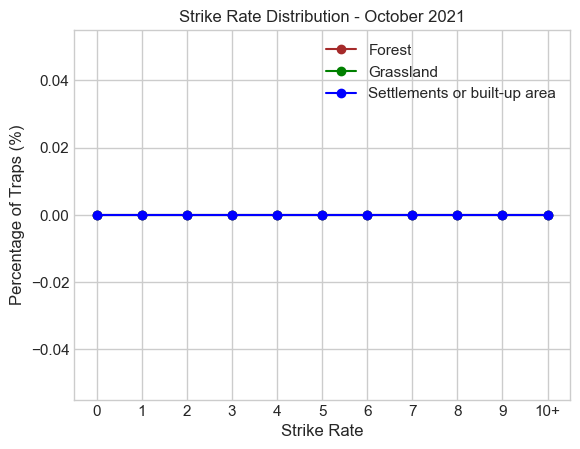

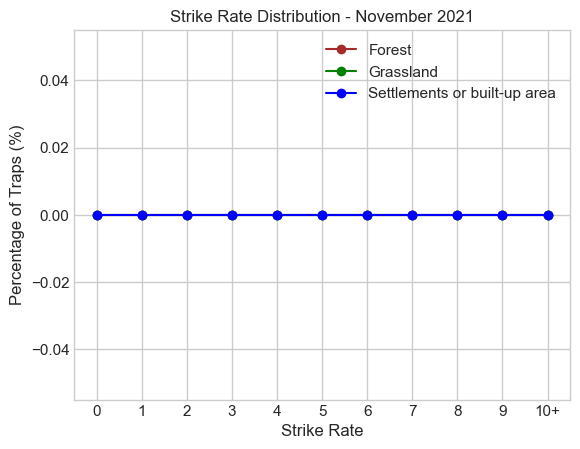

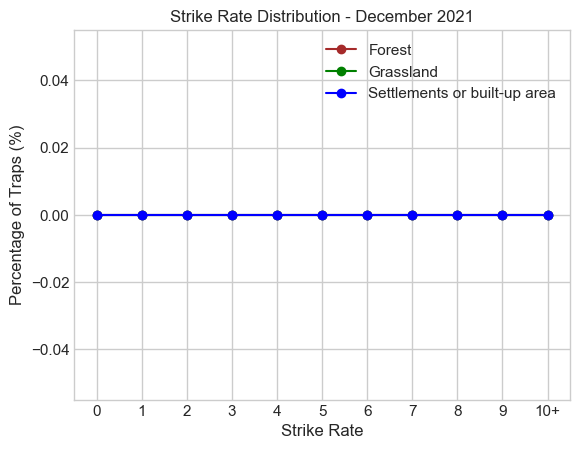

In [88]:
# Define the landUse types and corresponding colors
land_use_types = ['Forest', 'Grassland', 'Settlements or built-up area']
colors = ['brown', 'green', 'blue']

# Iterate over each month in 2019
for month in range(1, 13):
    # Filter the data for the specific month and landUse types
    df_month = df_nz[
        (df_nz['when'].dt.year == 2021)
        & (df_nz['when'].dt.month == month)
        & (df_nz['landUse'].isin(land_use_types))
    ]
    
    # Calculate the strike rate distribution for each landUse type
    strike_distribution = {land_use: {i: 0 for i in range(11)} for land_use in land_use_types}
    total_traps = {land_use: 0 for land_use in land_use_types}
    
    # Count the number of traps for each strike rate and landUse type
    for land_use, group in df_month.groupby('landUse'):
        total_traps[land_use] = len(group['trapId'].unique())
        for trap_id, trap_group in group.groupby('trapId'):
            strike_count = trap_group[trap_group['activityType'] == 'STRIKE'].shape[0]
            strike_distribution[land_use][min(strike_count, 10)] += 1
    
    # Calculate the percentage of traps for each strike rate and landUse type
    strike_percentages = {
        land_use: [count / total_traps[land_use] * 100 if total_traps[land_use] > 0 else 0 for count in strike_distribution[land_use].values()]
        for land_use in land_use_types
    }
    
    # Combine the counts for strike rate 10 and above
    for land_use in strike_percentages:
        strike_percentages[land_use][-1] = sum(strike_percentages[land_use][10:])
        strike_percentages[land_use] = strike_percentages[land_use][:11]
    
    # Prepare the data for plotting
    x = list(range(11))
    x_labels = [str(i) for i in x[:-1]] + ['10+']
    
    # Plot the line chart for each landUse type with corresponding color
    for i, land_use in enumerate(strike_percentages):
        y = strike_percentages[land_use]
        plt.plot(x, y, marker='o', label=land_use, color=colors[i])
    
    # Add labels and title
    plt.xlabel('Strike Rate')
    plt.ylabel('Percentage of Traps (%)')
    month_name = calendar.month_name[month]
    plt.title(f'Strike Rate Distribution - {month_name} 2021')
    
    # Add a legend
    plt.legend()
    
    # Set x-axis tick labels
    plt.xticks(x, x_labels)
    
    # Show the plot
    plt.show()


In [135]:
# Filter the data for January 2019 and land use "Forest"
df_jan_2019_forest = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['when'].dt.month == 1) & (df_nz['landUse'] == 'Settlements or built-up area')]

# Filter the data for STRIKE activity
df_strikes = df_jan_2019_forest[df_jan_2019_forest['activityType'] == 'STRIKE']

# Group the data by trapId and count the occurrences of strikes
grouped = df_strikes.groupby('trapId').size().reset_index(name='strike_count')

# Sort the data by strike_count in descending order
grouped = grouped.sort_values('strike_count', ascending=False)

# Reset the index to get the desired numbering
grouped = grouped.reset_index(drop=True)

# Print the result
print(grouped)

     trapId  strike_count
0      6092             7
1      9014             6
2      9576             6
3      9394             6
4      7608             6
..      ...           ...
249    7244             1
250    7462             1
251    7528             1
252    7543             1
253    7793             1

[254 rows x 2 columns]


In [191]:
# Filter the data for January 2019 and land use "Forest"
df_jan_2019_forest = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['when'].dt.month == 4) & (df_nz['landUse'] == 'Settlements or built-up area')]

# Filter the data for STRIKE and CO2_REPLACED activity
df_strikes = df_jan_2019_forest[df_jan_2019_forest['activityType'] == 'STRIKE']
df_co2_replaced = df_jan_2019_forest[df_jan_2019_forest['activityType'] == 'CO2_REPLACED']

# Group the data by trapId and count the occurrences of strikes and CO2 replaced
grouped_strikes = df_strikes.groupby('trapId').size().reset_index(name='strike_count')
grouped_co2_replaced = df_co2_replaced.groupby('trapId').size().reset_index(name='co2_replaced_count')

# Sort the data by strike_count in descending order
grouped_strikes = grouped_strikes.sort_values('strike_count', ascending=False)

# Reset the index to get the desired numbering
grouped_strikes = grouped_strikes.reset_index(drop=True)

# Merge the strikes and CO2 replaced data based on trapId
grouped = pd.merge(grouped_strikes, grouped_co2_replaced, on='trapId', how='left')

# Replace NaN values in co2_replaced_count column with 0
grouped['co2_replaced_count'].fillna(0, inplace=True)

# Print the result
print(grouped)


     trapId  strike_count  co2_replaced_count
0     12894            20                 0.0
1      5914            10                 1.0
2     12360             8                 0.0
3     12846             8                 0.0
4      7500             8                 1.0
..      ...           ...                 ...
316    8071             1                 1.0
317    8096             1                 0.0
318    8180             1                 0.0
319    8182             1                 0.0
320   13523             1                 0.0

[321 rows x 3 columns]


In [145]:
# Filter the data for 2020 and land use "Settlements or built-up area"
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Settlements or built-up area')]

# Filter the data for STRIKE activity
df_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'STRIKE']

# Group the data by month and trapId, and calculate the average strikes per month
grouped = df_strikes.groupby([df_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes = grouped.groupby('when')['strike_count'].mean()

# Print the average rate of strikes for each month in 2020 for settlements or built-up areas
for month, avg in average_strikes.items():
    print(f"Month {month}: Average rate of strikes = {avg:.2f}")


Month 1: Average rate of strikes = 3.69
Month 2: Average rate of strikes = 2.35
Month 3: Average rate of strikes = 1.77
Month 4: Average rate of strikes = 2.74
Month 5: Average rate of strikes = 2.10
Month 6: Average rate of strikes = 2.03
Month 7: Average rate of strikes = 3.65
Month 8: Average rate of strikes = 2.11
Month 9: Average rate of strikes = 2.55
Month 10: Average rate of strikes = 2.17
Month 11: Average rate of strikes = 1.98
Month 12: Average rate of strikes = 2.01


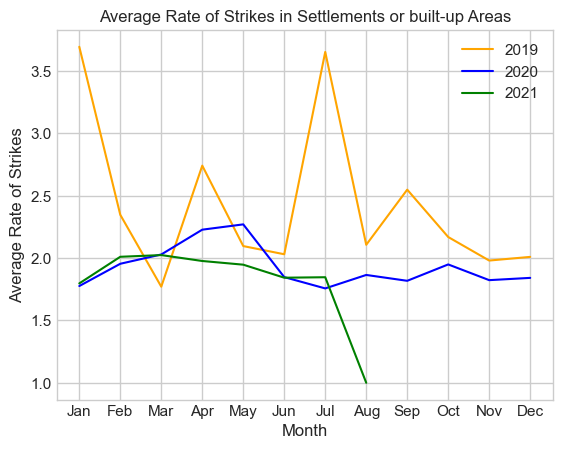

In [152]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Settlements or built-up area"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Settlements or built-up area') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'STRIKE']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'STRIKE']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'STRIKE']

# Group the data by month and trapId, and calculate the average strikes per month for 2019
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2020
grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2021
grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for 2019
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, average_strikes_2019, color='orange', label='2019')

# Create a line plot for 2020
plt.plot(months, average_strikes_2020, color='blue', label='2020')

# Create a line plot for 2021 (up to August)
plt.plot(months[:8], average_strikes_2021, color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of Strikes in Settlements or built-up Areas')
plt.legend()

# Display the plot
plt.show()


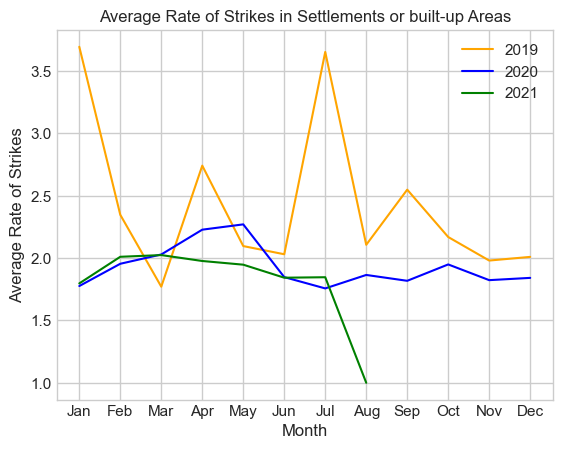

In [155]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Settlements or built-up area"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Settlements or built-up area') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'STRIKE']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'STRIKE']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'STRIKE']

# Group the data by month and trapId, and calculate the average strikes per month for 2019
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2020
grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2021
grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for 2019
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, average_strikes_2019, color='orange', label='2019')

# Create a line plot for 2020
plt.plot(months, average_strikes_2020, color='blue', label='2020')

# Create a line plot for 2021 (up to August)
plt.plot(months[:8], average_strikes_2021, color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of Strikes in Settlements or built-up Areas')
plt.legend()

# Display the plot
plt.show()


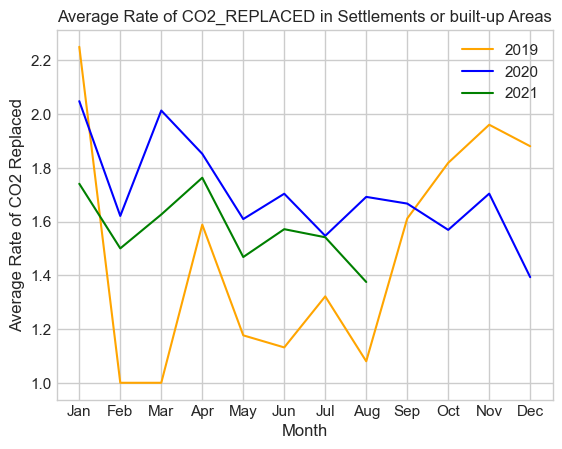

In [153]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Settlements or built-up area"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Settlements or built-up area')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Settlements or built-up area') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'CO2_REPLACED']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'CO2_REPLACED']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'CO2_REPLACED']

# Group the data by month and trapId, and calculate the average strikes per month for 2019
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='co2replaced_count')
average_strikes_2019 = grouped_2019.groupby('when')['co2replaced_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2020
grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='co2replaced_count')
average_strikes_2020 = grouped_2020.groupby('when')['co2replaced_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2021
grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='co2replaced_count')
average_strikes_2021 = grouped_2021.groupby('when')['co2replaced_count'].mean()

# Create a line plot for 2019
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, average_strikes_2019, color='orange', label='2019')

# Create a line plot for 2020
plt.plot(months, average_strikes_2020, color='blue', label='2020')

# Create a line plot for 2021 (up to August)
plt.plot(months[:8], average_strikes_2021, color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of CO2 Replaced')
plt.title('Average Rate of CO2_REPLACED in Settlements or built-up Areas')
plt.legend()

# Display the plot
plt.show()


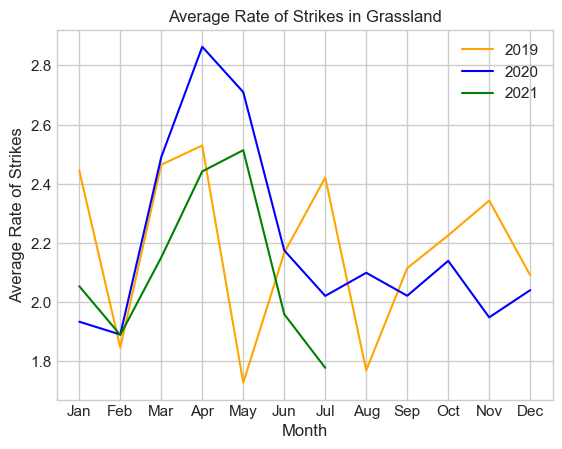

In [162]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Settlements or built-up area"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Grassland')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Grassland')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Grassland') & (df_nz['when'].dt.month <= 7)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'STRIKE']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'STRIKE']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'STRIKE']

# Group the data by month and trapId, and calculate the average strikes per month for 2019
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2020
grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

# Group the data by month and trapId, and calculate the average strikes per month for 2021
grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for 2019
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, average_strikes_2019, color='orange', label='2019')

# Create a line plot for 2020
plt.plot(months, average_strikes_2020, color='blue', label='2020')

# Create a line plot for 2021 (up to August)
plt.plot(months[:7], average_strikes_2021, color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of Strikes in Grassland')
plt.legend()

# Display the plot
plt.show()


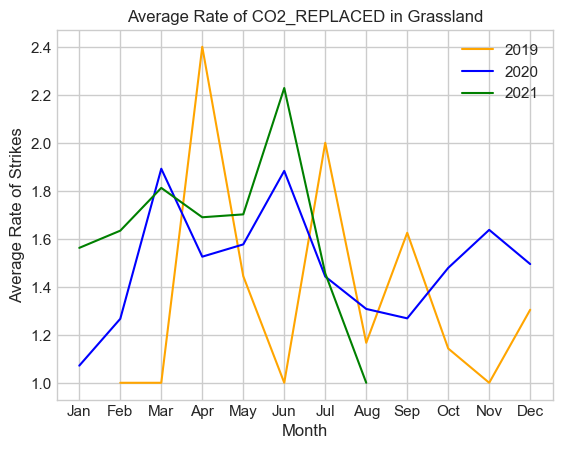

In [178]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Grassland"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Grassland')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Grassland')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Grassland') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'CO2_REPLACED']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'CO2_REPLACED']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'CO2_REPLACED']

# Group the data by month and trapId, and calculate the average strikes per month for each year
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for each year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months[:12], average_strikes_2019.reindex(range(1, 13)), color='orange', label='2019')
plt.plot(months[:12], average_strikes_2020.reindex(range(1, 13)), color='blue', label='2020')
plt.plot(months[:8], average_strikes_2021.reindex(range(1, 9)), color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of CO2_REPLACED in Grassland')
plt.legend()

# Display the plot
plt.show()


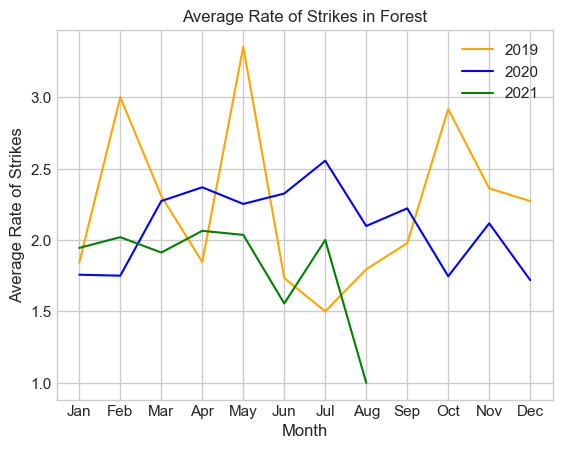

In [181]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Grassland"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Forest')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Forest')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Forest') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'STRIKE']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'STRIKE']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'STRIKE']

# Group the data by month and trapId, and calculate the average strikes per month for each year
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for each year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months[:12], average_strikes_2019.reindex(range(1, 13)), color='orange', label='2019')
plt.plot(months[:12], average_strikes_2020.reindex(range(1, 13)), color='blue', label='2020')
plt.plot(months[:8], average_strikes_2021.reindex(range(1, 9)), color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of Strikes in Forest')
plt.legend()

# Display the plot
plt.show()


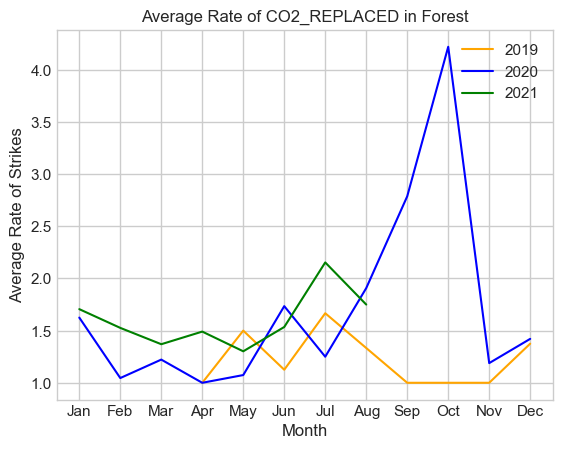

In [182]:
# Filter the data for 2019, 2020, and 2021 (up to August) and land use "Grassland"
df_2019_settlements = df_nz[(df_nz['when'].dt.year == 2019) & (df_nz['landUse'] == 'Forest')]
df_2020_settlements = df_nz[(df_nz['when'].dt.year == 2020) & (df_nz['landUse'] == 'Forest')]
df_2021_settlements = df_nz[(df_nz['when'].dt.year == 2021) & (df_nz['landUse'] == 'Forest') & (df_nz['when'].dt.month <= 8)]

# Filter the data for STRIKE activity
df_2019_strikes = df_2019_settlements[df_2019_settlements['activityType'] == 'CO2_REPLACED']
df_2020_strikes = df_2020_settlements[df_2020_settlements['activityType'] == 'CO2_REPLACED']
df_2021_strikes = df_2021_settlements[df_2021_settlements['activityType'] == 'CO2_REPLACED']

# Group the data by month and trapId, and calculate the average strikes per month for each year
grouped_2019 = df_2019_strikes.groupby([df_2019_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2019 = grouped_2019.groupby('when')['strike_count'].mean()

grouped_2020 = df_2020_strikes.groupby([df_2020_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2020 = grouped_2020.groupby('when')['strike_count'].mean()

grouped_2021 = df_2021_strikes.groupby([df_2021_strikes['when'].dt.month, 'trapId']).size().reset_index(name='strike_count')
average_strikes_2021 = grouped_2021.groupby('when')['strike_count'].mean()

# Create a line plot for each year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months[:12], average_strikes_2019.reindex(range(1, 13)), color='orange', label='2019')
plt.plot(months[:12], average_strikes_2020.reindex(range(1, 13)), color='blue', label='2020')
plt.plot(months[:8], average_strikes_2021.reindex(range(1, 9)), color='green', label='2021')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Rate of Strikes')
plt.title('Average Rate of CO2_REPLACED in Forest')
plt.legend()

# Display the plot
plt.show()


## Poisson Regression Modelling

In [318]:
# Filter the data for the specified land use types
land_use_types = ['Settlements or built-up area', 'Grassland', 'Forest']
df_filtered = df_nz[df_nz['landUse'].isin(land_use_types)]

# Extract the month and year from the "when" column
df_filtered['month'] = df_filtered['when'].dt.month
df_filtered['year'] = df_filtered['when'].dt.year

# Group the data by trapId, month, and year and calculate the total strike count
grouped_strikes = df_filtered[df_filtered['activityType'] == 'STRIKE'].groupby(['trapId', 'month', 'year']).size().reset_index(name='strikeRate')

# Group the data by trapId, month, and year and calculate the total CO2_REPLACED count
grouped_co2_replaced = df_filtered[df_filtered['activityType'] == 'CO2_REPLACED'].groupby(['trapId', 'month', 'year']).size().reset_index(name='co2_replacedRate')

# Merge the strike and CO2_REPLACED data based on trapId, month, and year
grouped = pd.merge(grouped_strikes, grouped_co2_replaced, on=['trapId', 'month', 'year'], how='outer')

# Create a mapping DataFrame for trapId and landUse
mapping_df = df_filtered[['trapId', 'landUse']].drop_duplicates().set_index('trapId')

# Add the landUse column based on trapId using the mapping DataFrame
grouped['landUse'] = grouped['trapId'].map(mapping_df['landUse'])

# Sort the data by strikeRate in descending order
grouped = grouped.sort_values('strikeRate', ascending=False)

# Print the resulting dataframe
grouped['co2_replacedRate'] = grouped['co2_replacedRate'].fillna(0)
grouped['strikeRate'] = grouped['strikeRate'].fillna(0)
grouped


C:\Users\psych\AppData\Local\Temp\ipykernel_30832\238880623.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['when'].dt.month
C:\Users\psych\AppData\Local\Temp\ipykernel_30832\238880623.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['when'].dt.year


trapId  month  year  strikeRate  co2_replacedRate  \
32       1087      8  2018       197.0               0.0   
31       1086      8  2018       186.0               0.0   
50       1138      8  2018       185.0               1.0   
29       1083      8  2018       183.0               0.0   
28       1082      8  2018       118.0               0.0   
...       ...    ...   ...         ...               ...   
21858   20796      4  2021         0.0               1.0   
21859   20796      5  2021         0.0               5.0   
21860   20798      4  2021         0.0               1.0   
21861   20799      4  2021         0.0               1.0   
21862   20807      5  2021         0.0               1.0   

                            landUse  
32     Settlements or built-up area  
31     Settlements or built-up area  
50     Settlements or built-up area  
29     Settlements or built-up area  
28     Settlements or built-up area  
...                             ...  
21858                     Grassland  
21859                     Grassland  
21860                     Grassland  
21861                     Grassland  
21862                     Grassland  

[21863 rows x 6 columns]

In [316]:
grouped = grouped[grouped['year'] != 2018]
grouped

trapId  month  year  strikeRate  co2_replacedRate  \
11569   13417      5  2020       114.0               2.0   
10173   12270      5  2020       100.0               0.0   
668      2433      9  2019        68.0               0.0   
1576     3583      7  2019        68.0               2.0   
12307   14129      8  2020        60.0               0.0   
...       ...    ...   ...         ...               ...   
21858   20796      4  2021         0.0               1.0   
21859   20796      5  2021         0.0               5.0   
21860   20798      4  2021         0.0               1.0   
21861   20799      4  2021         0.0               1.0   
21862   20807      5  2021         0.0               1.0   

                            landUse  
11569  Settlements or built-up area  
10173                     Grassland  
668    Settlements or built-up area  
1576   Settlements or built-up area  
12307                     Grassland  
...                             ...  
21858                     Grassland  
21859                     Grassland  
21860                     Grassland  
21861                     Grassland  
21862                     Grassland  

[21725 rows x 6 columns]

In [319]:
# Create a dictionary to map landUse values to labels
land_use_labels = {
    'Settlements or built-up area': 1,
    'Grassland': 2,
    'Forest': 3
}

# Convert the landUse column to label encoding
grouped['landUse'] = grouped['landUse'].map(land_use_labels)
grouped

trapId  month  year  strikeRate  co2_replacedRate  landUse
32       1087      8  2018       197.0               0.0        1
31       1086      8  2018       186.0               0.0        1
50       1138      8  2018       185.0               1.0        1
29       1083      8  2018       183.0               0.0        1
28       1082      8  2018       118.0               0.0        1
...       ...    ...   ...         ...               ...      ...
21858   20796      4  2021         0.0               1.0        2
21859   20796      5  2021         0.0               5.0        2
21860   20798      4  2021         0.0               1.0        2
21861   20799      4  2021         0.0               1.0        2
21862   20807      5  2021         0.0               1.0        2

[21863 rows x 6 columns]

In [327]:
# Filter rows with landUse types 2 and 3
settlements_model = grouped.drop(grouped[grouped['landUse'].isin([2, 3])].index)

# Print the resulting dataframe
settlements_model


trapId  month  year  strikeRate  co2_replacedRate  landUse
32       1087      8  2018       197.0               0.0        1
31       1086      8  2018       186.0               0.0        1
50       1138      8  2018       185.0               1.0        1
29       1083      8  2018       183.0               0.0        1
28       1082      8  2018       118.0               0.0        1
...       ...    ...   ...         ...               ...      ...
21834   20066      5  2021         0.0               2.0        1
21837   20166     11  2020         0.0               1.0        1
21841   20356      7  2021         0.0               2.0        1
21844   20453      1  2021         0.0               1.0        1
21849   20676      7  2021         0.0               1.0        1

[8785 rows x 6 columns]

In [328]:
grassland_model = grouped.drop(grouped[grouped['landUse'].isin([1, 3])].index)
grassland_model

trapId  month  year  strikeRate  co2_replacedRate  landUse
10173   12270      5  2020       100.0               0.0        2
12307   14129      8  2020        60.0               0.0        2
10172   12270      4  2020        44.0               0.0        2
280      2072      5  2021        43.0               0.0        2
10114   12200      9  2020        43.0               1.0        2
...       ...    ...   ...         ...               ...      ...
21858   20796      4  2021         0.0               1.0        2
21859   20796      5  2021         0.0               5.0        2
21860   20798      4  2021         0.0               1.0        2
21861   20799      4  2021         0.0               1.0        2
21862   20807      5  2021         0.0               1.0        2

[9742 rows x 6 columns]

In [329]:
forest_model = grouped.drop(grouped[grouped['landUse'].isin([1, 2])].index)
forest_model

trapId  month  year  strikeRate  co2_replacedRate  landUse
71       1312      5  2019        58.0               0.0        3
1450     3501     10  2019        28.0               0.0        3
6966     8220      9  2020        25.0               0.0        3
3808     5165      7  2020        19.0               1.0        3
12842   14567      7  2020        16.0               3.0        3
...       ...    ...   ...         ...               ...      ...
21820   19833      6  2021         0.0               1.0        3
21821   19835      6  2021         0.0               1.0        3
21847   20666      7  2021         0.0              11.0        3
21848   20666      8  2021         0.0               1.0        3
21855   20768      8  2021         0.0               1.0        3

[3336 rows x 6 columns]

In [228]:
from scipy import stats
# Create a contingency table of landUse and strikeRate
contingency_table = pd.crosstab(grouped['landUse'], grouped['strikeRate'])

# Perform chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the chi-squared test result
print("Chi-squared p-value:", p_value)


Chi-squared p-value: 3.996081429840717e-43


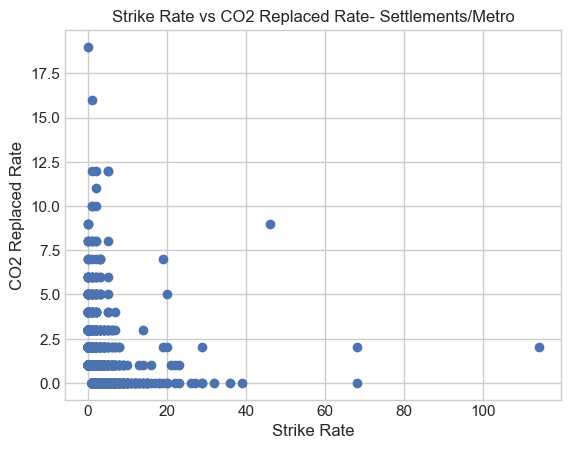

In [455]:
# Filter the data for years 2019 to 2021
filtered_data = settlements_model[(settlements_model['year'] >= 2019) & (settlements_model['year'] <= 2021)]

plt.scatter(filtered_data['strikeRate'], filtered_data['co2_replacedRate'])
plt.xlabel('Strike Rate')
plt.ylabel('CO2 Replaced Rate')
plt.title('Strike Rate vs CO2 Replaced Rate- Settlements/Metro')
plt.show()


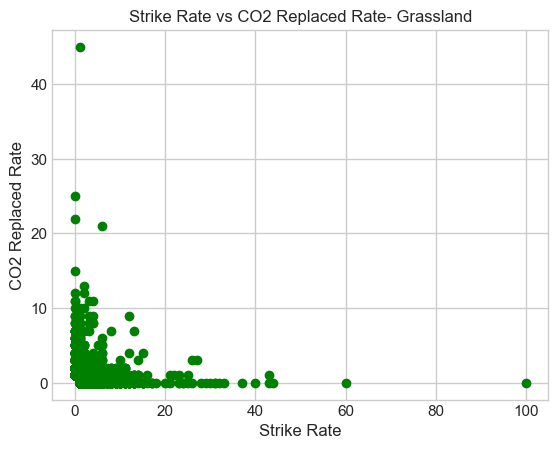

In [454]:
# Filter the data for years 2019 to 2021
filtered_data = grassland_model[(grassland_model['year'] >= 2019) & (grassland_model['year'] <= 2021)]

plt.scatter(filtered_data['strikeRate'], filtered_data['co2_replacedRate'], color = 'green')
plt.xlabel('Strike Rate')
plt.ylabel('CO2 Replaced Rate')
plt.title('Strike Rate vs CO2 Replaced Rate- Grassland')
plt.show()


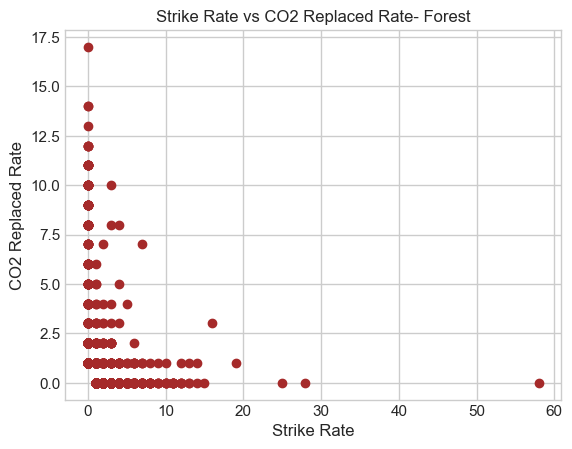

In [457]:
# Filter the data for years 2019 to 2021
filtered_data = forest_model[(forest_model['year'] >= 2019) & (forest_model['year'] <= 2021)]

plt.scatter(filtered_data['strikeRate'], filtered_data['co2_replacedRate'], color = 'brown')
plt.xlabel('Strike Rate')
plt.ylabel('CO2 Replaced Rate')
plt.title('Strike Rate vs CO2 Replaced Rate- Forest')
plt.show()


## poisson model for metro regions

In [493]:
import statsmodels.api as sm
# Create the design matrix by adding a constant column
X = sm.add_constant(settlements_model[['month', 'year']])

# Create the Poisson regression model
poisson_model_settlements = sm.GLM(settlements_model['strikeRate'], X, family=sm.families.Poisson())

# Fit the model
poisson_results_settlements = poisson_model_settlements.fit()

# Print the summary of the Poisson regression model
print(poisson_results_settlements.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             strikeRate   No. Observations:                 8785
Model:                            GLM   Df Residuals:                     8782
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19992.
Date:                Mon, 03 Jul 2023   Deviance:                       22215.
Time:                        07:31:31   Pearson chi2:                 5.94e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3297
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1393.9292     23.117     60.300      0.0

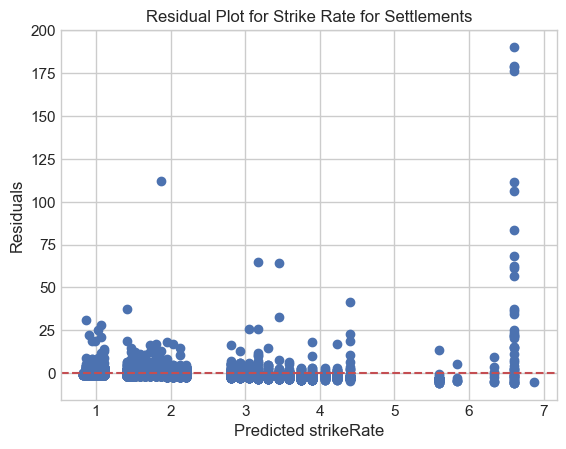

In [495]:
# Get the predicted values from the Poisson regression model
predicted_values_settlements = poisson_results_settlements.predict(X)

# Calculate the residuals
residuals_settlements = settlements_model['strikeRate'] - predicted_values_settlements

# Create the residual plot
plt.scatter(predicted_values_settlements, residuals_settlements)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted strikeRate')
plt.ylabel('Residuals')
plt.title('Residual Plot for Strike Rate for Settlements')
plt.show()


In [343]:
mean_residuals_settlements = residuals_settlements.mean()
print("Mean of Residuals (Settlements Model):", mean_residuals_settlements)


Mean of Residuals (Settlements Model): -4.883450790400912e-11


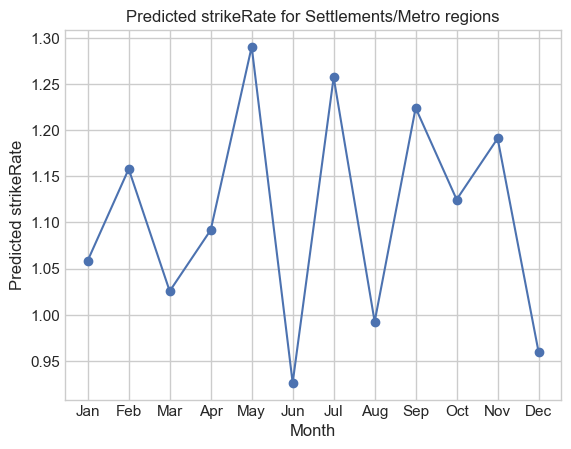

In [346]:
# Create a DataFrame for prediction
prediction_data = pd.DataFrame({'month': settlements_model['month'].unique(), 'year': settlements_model['year'].iloc[0]})

# Add a constant column to the prediction data
prediction_data['const'] = 1

# Predict the strikeRate for landUse type 1 and each month
predicted_strikeRate = (
    prediction_data['const'] * poisson_results.params['const'] +
    prediction_data['month'] * poisson_results.params['month'] +
    prediction_data['year'] * poisson_results.params['year']
)

# Create a line plot for the predicted strikeRate
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
fig, ax = plt.subplots()
ax.plot(month_numbers, predicted_strikeRate, marker='o')
ax.set_xticks(month_numbers)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Predicted strikeRate')
ax.set_title('Predicted strikeRate for Settlements/Metro regions')

plt.show()


## poisson model for co2 replaced- metro regions

In [355]:
# Create the design matrix by adding a constant column
X = sm.add_constant(settlements_model[['month', 'year', 'strikeRate']])

# Create the Poisson regression model
poisson_model_settlements_co2 = sm.GLM(settlements_model['co2_replacedRate'], X, family=sm.families.Poisson())

# Fit the model
poisson_results_settlements_co2 = poisson_model_settlements_co2.fit()

# Print the summary of the Poisson regression model
print(poisson_results_settlements_co2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       co2_replacedRate   No. Observations:                 8785
Model:                            GLM   Df Residuals:                     8781
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8203.8
Date:                Sun, 02 Jul 2023   Deviance:                       11119.
Time:                        13:57:10   Pearson chi2:                 2.70e+08
No. Iterations:                     7   Pseudo R-squ. (CS):            0.06610
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1072.9545     58.819    -18.242      0.0

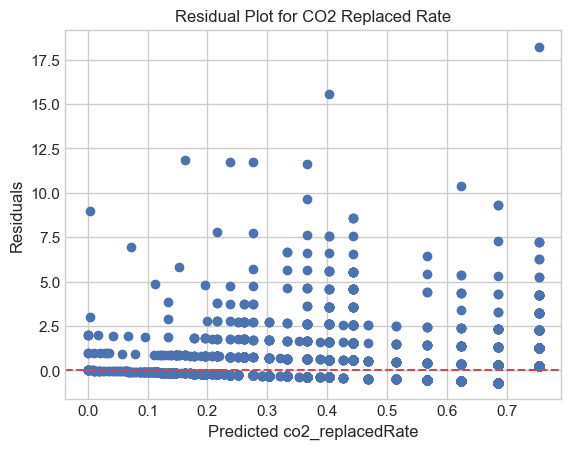

In [349]:
# Get the predicted values from the Poisson regression model
predicted_values_settlements_co2 = poisson_results_settlements_co2.mu

# Calculate the residuals
residuals_settlements_co2 = settlements_model['co2_replacedRate'] - predicted_values_settlements_co2

# Create the residual plot
plt.scatter(predicted_values_settlements_co2, residuals_settlements_co2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted co2_replacedRate')
plt.ylabel('Residuals')
plt.title('Residual Plot for CO2 Replaced Rate')
plt.show()


In [350]:
mean_residuals_settlements_co2 = residuals_settlements_co2.mean()
print("Mean of Residuals (co2_replacedRate - Settlements Model):", mean_residuals_settlements_co2)


Mean of Residuals (co2_replacedRate - Settlements Model): 6.044140992418205e-12


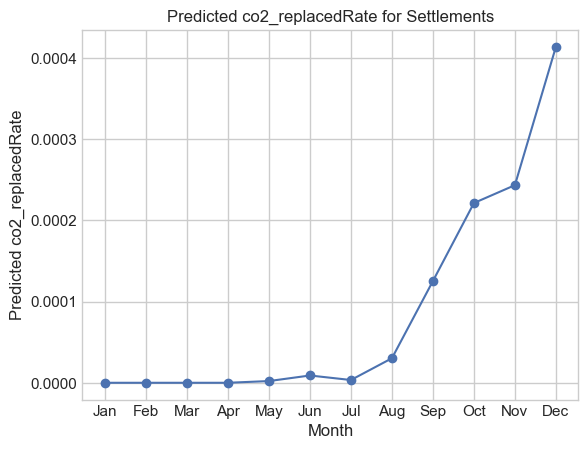

In [371]:
# Get the predicted values of co2_replacedRate from the Poisson regression model
predicted_co2_replaced = poisson_results_settlements_co2.mu[:12]  # Take the first 12 predicted values for the 12 months

# Create the line plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
plt.plot(month_numbers, predicted_co2_replaced, marker='o')
plt.xticks(month_numbers, months)
plt.xlabel('Month')
plt.ylabel('Predicted co2_replacedRate')
plt.title('Predicted co2_replacedRate for Settlements')
plt.show()


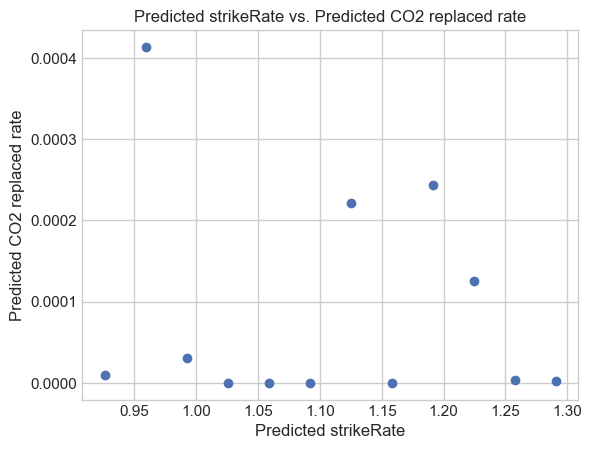

In [372]:
# Get the predicted values of strikeRate and CO2 replaced rate
predicted_strikeRate = (
    prediction_data['const'] * poisson_results.params['const'] +
    prediction_data['month'] * poisson_results.params['month'] +
    prediction_data['year'] * poisson_results.params['year']
)
predicted_co2_replaced = poisson_results_settlements_co2.mu[:12]  # Take the first 12 predicted values for the 12 months

# Create a scatter plot of predicted strikeRate vs. predicted CO2 replaced rate
plt.scatter(predicted_strikeRate, predicted_co2_replaced)
plt.xlabel('Predicted strikeRate')
plt.ylabel('Predicted CO2 replaced rate')
plt.title('Predicted strikeRate vs. Predicted CO2 replaced rate')
plt.show()


## poisson model for grassland regions

In [463]:
# Create the design matrix by adding a constant column
X = sm.add_constant(grassland_model[['month', 'year']])

# Create the Poisson regression model
poisson_model_grassland = sm.GLM(grassland_model['strikeRate'], X, family=sm.families.Poisson())

# Fit the model
poisson_results_grassland = poisson_model_grassland.fit()

# Print the summary of the Poisson regression model
print(poisson_results_grassland.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             strikeRate   No. Observations:                 9742
Model:                            GLM   Df Residuals:                     9739
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19266.
Date:                Mon, 03 Jul 2023   Deviance:                       18324.
Time:                        07:03:31   Pearson chi2:                 3.55e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02802
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.0501     26.933     16.710      0.0

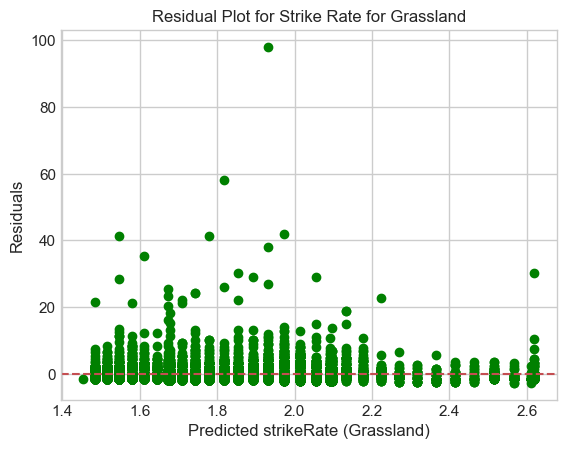

In [465]:
# Get the predicted values from the Poisson regression model
predicted_values_grassland = poisson_results_grassland.predict(X)

# Calculate the residuals
residuals_grassland = grassland_model['strikeRate'] - predicted_values_grassland

# Create the residual plot
plt.scatter(predicted_values_grassland, residuals_grassland, color = 'green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted strikeRate (Grassland)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Strike Rate for Grassland')
plt.show()


In [429]:
mean_residuals_grassland = residuals_grassland.mean()
print("Mean of Residuals (Grassland Model):", mean_residuals_grassland)


Mean of Residuals (Grassland Model): 4.13478398626279e-12


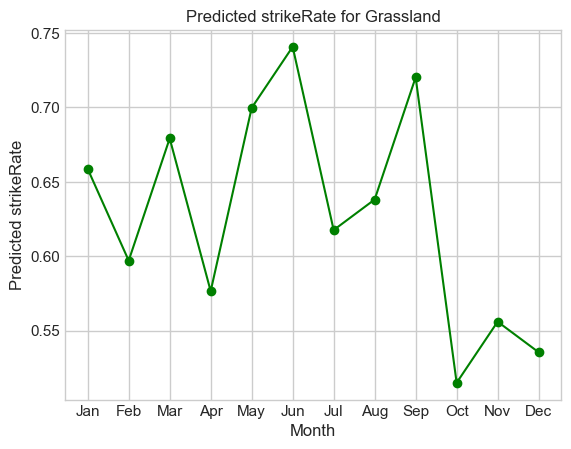

In [389]:
# Create a DataFrame for prediction
prediction_data_grassland = pd.DataFrame({'month': grassland_model['month'].unique(), 'year': grassland_model['year'].iloc[0]})

# Add a constant column to the prediction data
prediction_data_grassland['const'] = 1

# Predict the strikeRate for the grassland model
predicted_strikeRate_grassland = (
    prediction_data_grassland['const'] * poisson_results_grassland.params['const'] +
    prediction_data_grassland['month'] * poisson_results_grassland.params['month'] +
    prediction_data_grassland['year'] * poisson_results_grassland.params['year']
)

# Create a line plot for the predicted strikeRate
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
fig, ax = plt.subplots()
ax.plot(month_numbers, predicted_strikeRate_grassland, color = 'green', marker='o')
ax.set_xticks(month_numbers)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Predicted strikeRate')
ax.set_title('Predicted strikeRate for Grassland')

plt.show()


## poisson model for co2 replaced- grassland regions

In [407]:
# Create the design matrix by adding a constant column
X_grassland = sm.add_constant(grassland_model[['month', 'year', 'strikeRate']])

# Create the Poisson regression model for grassland
poisson_model_grassland = sm.GLM(grassland_model['co2_replacedRate'], X_grassland, family=sm.families.Poisson())

# Fit the model
poisson_results_grassland = poisson_model_grassland.fit()

# Print the summary of the Poisson regression model for grassland
print(poisson_results_grassland.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       co2_replacedRate   No. Observations:                 9742
Model:                            GLM   Df Residuals:                     9738
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8209.4
Date:                Sun, 02 Jul 2023   Deviance:                       10963.
Time:                        15:10:52   Pearson chi2:                 5.83e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1814
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2153.7495     70.079    -30.733      0.0

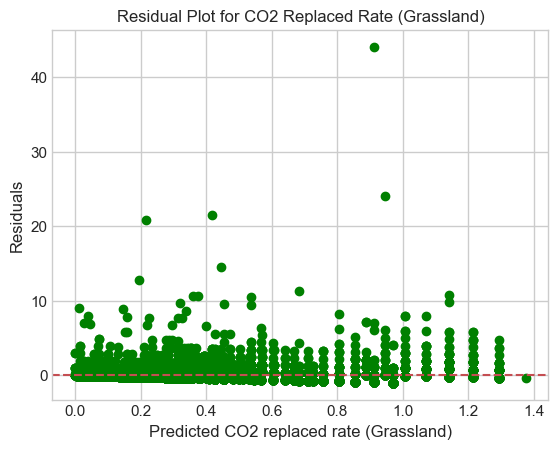

In [409]:
# Get the predicted values from the Poisson regression model for grassland
predicted_values_grassland_co2 = poisson_results_grassland.mu

# Calculate the residuals for grassland
residuals_grassland_co2 = grassland_model['co2_replacedRate'] - predicted_values_grassland_co2

# Create the residual plot for grassland
plt.scatter(predicted_values_grassland_co2, residuals_grassland_co2, color = 'green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO2 replaced rate (Grassland)')
plt.ylabel('Residuals')
plt.title('Residual Plot for CO2 Replaced Rate (Grassland)')
plt.show()


In [413]:
mean_residuals_grassland_co2 = residuals_grassland_co2.mean()
print("Mean of Residuals (CO2 Replaced Rate - Grassland Model):", mean_residuals_grassland_co2)


Mean of Residuals (CO2 Replaced Rate - Grassland Model): -1.6348405327547354e-11


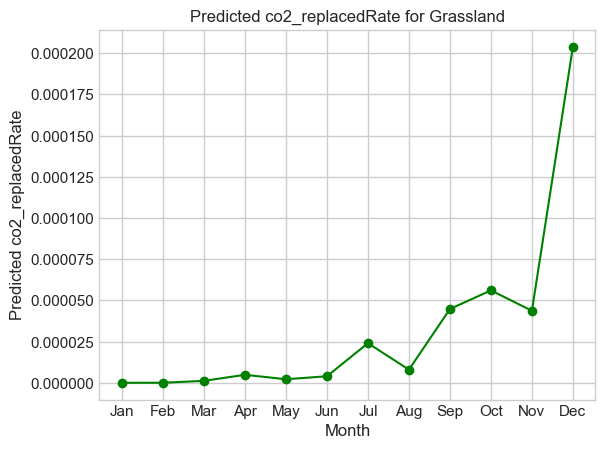

In [418]:
# Get the predicted values of co2_replacedRate from the Poisson regression model for grassland
predicted_co2_replaced_grassland = poisson_results_grassland.predict(X_grassland)

# Take the first 12 predicted values for the 12 months
predicted_co2_replaced_grassland_monthly = predicted_co2_replaced_grassland[:12]

# Create the line plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
plt.plot(month_numbers, predicted_co2_replaced_grassland_monthly, color = 'green', marker='o')
plt.xticks(month_numbers, months)
plt.xlabel('Month')
plt.ylabel('Predicted co2_replacedRate')
plt.title('Predicted co2_replacedRate for Grassland')
plt.show()


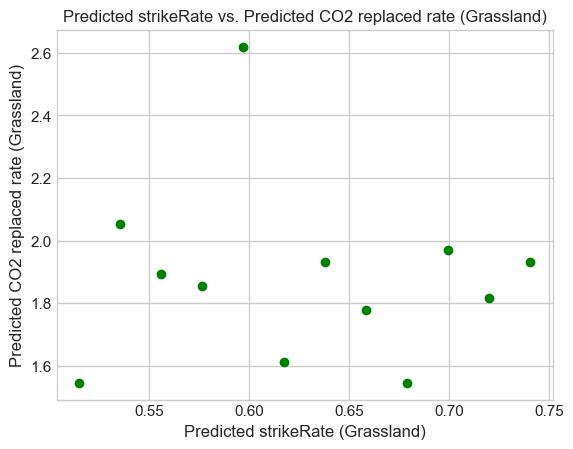

In [444]:
# Get the predicted values of strikeRate and CO2 replaced rate
predicted_strikeRate_grassland = (
    prediction_data['const'] * poisson_results_grassland.params['const'] +
    prediction_data['month'] * poisson_results_grassland.params['month'] +
    prediction_data['year'] * poisson_results_grassland.params['year']
)
predicted_co2_replaced_grassland = poisson_results_grassland.mu[:12]  # Take the first 12 predicted values for the 12 months

# Create a scatter plot of predicted strikeRate vs. predicted CO2 replaced rate for grasslands
plt.scatter(predicted_strikeRate_grassland, predicted_co2_replaced_grassland, color = 'green')
plt.xlabel('Predicted strikeRate (Grassland)')
plt.ylabel('Predicted CO2 replaced rate (Grassland)')
plt.title('Predicted strikeRate vs. Predicted CO2 replaced rate (Grassland)')
plt.show()


## poisson model for forest regions

In [496]:
# Create the design matrix by adding a constant column
X = sm.add_constant(forest_model[['month', 'year']])

# Create the Poisson regression model
poisson_model_forest_strike = sm.GLM(forest_model['strikeRate'], X, family=sm.families.Poisson())

# Fit the model
poisson_results_forest_strike = poisson_model_forest_strike.fit()

# Print the summary of the Poisson regression model
print(poisson_results_forest_strike.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             strikeRate   No. Observations:                 3336
Model:                            GLM   Df Residuals:                     3333
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6017.8
Date:                Mon, 03 Jul 2023   Deviance:                       6237.6
Time:                        07:32:27   Pearson chi2:                 9.12e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05882
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        692.8151     48.206     14.372      0.0

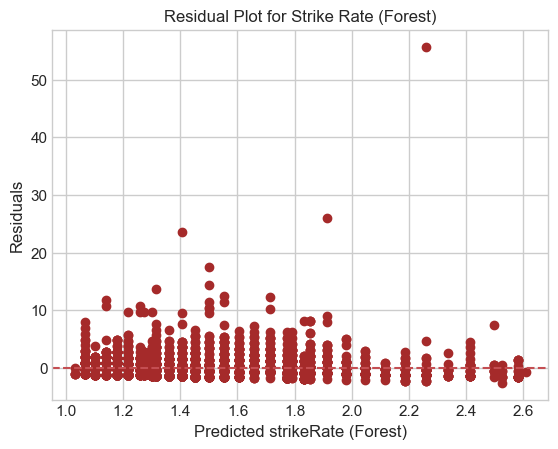

In [497]:
# Get the predicted values from the Poisson regression model
predicted_values_forest_strike = poisson_results_forest_strike.mu

# Calculate the residuals
residuals_forest_strike = forest_model['strikeRate'] - predicted_values_forest_strike

# Create the residual plot
plt.scatter(predicted_values_forest_strike, residuals_forest_strike, color='brown')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted strikeRate (Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Strike Rate (Forest)')
plt.show()


In [498]:
mean_residuals_forest_strike = residuals_forest_strike.mean()
print("Mean of Residuals (Forest Model):", mean_residuals_forest_strike)


Mean of Residuals (Forest Model): 1.731475075227778e-12


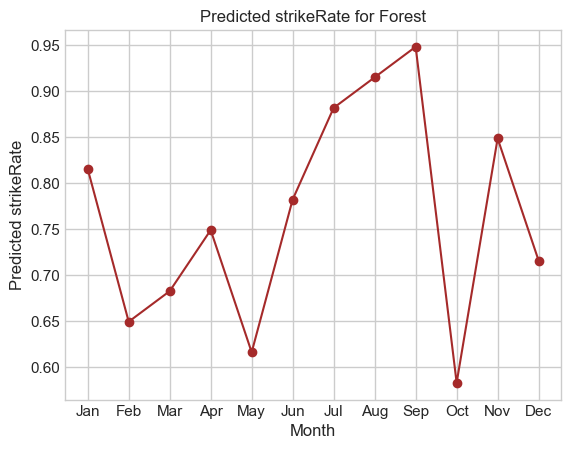

In [446]:
# Create a DataFrame for prediction
prediction_data_forest = pd.DataFrame({'month': forest_model['month'].unique(), 'year': forest_model['year'].iloc[0]})

# Add a constant column to the prediction data
prediction_data_forest['const'] = 1

# Predict the strikeRate for the forest model
predicted_strikeRate_forest = (
    prediction_data_forest['const'] * poisson_results_forest.params['const'] +
    prediction_data_forest['month'] * poisson_results_forest.params['month'] +
    prediction_data_forest['year'] * poisson_results_forest.params['year']
)

# Create a line plot for the predicted strikeRate
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
fig, ax = plt.subplots()
ax.plot(month_numbers, predicted_strikeRate_forest, color='brown', marker='o')
ax.set_xticks(month_numbers)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Predicted strikeRate')
ax.set_title('Predicted strikeRate for Forest')

plt.show()


## poisson model for co2 replaced- forest regions

In [499]:
# Create the design matrix by adding a constant column
X_forest = sm.add_constant(forest_model[['month', 'year', 'strikeRate']])

# Create the Poisson regression model for forest regions
poisson_model_forest_co2 = sm.GLM(forest_model['co2_replacedRate'], X_forest, family=sm.families.Poisson())

# Fit the model
poisson_results_forest_co2 = poisson_model_forest_co2.fit()

# Print the summary of the Poisson regression model for forest regions
print(poisson_results_forest_co2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       co2_replacedRate   No. Observations:                 3336
Model:                            GLM   Df Residuals:                     3332
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3577.8
Date:                Mon, 03 Jul 2023   Deviance:                       4330.4
Time:                        07:32:36   Pearson chi2:                 1.91e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4491
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -905.9180     96.167     -9.420      0.0

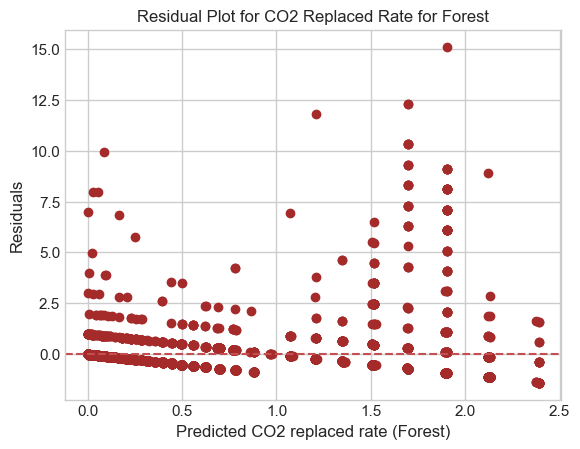

In [501]:
# Get the predicted values from the Poisson regression model
predicted_values_forest_co2 = poisson_results_forest_co2.mu

# Calculate the residuals
residuals_forest_co2 = forest_model['co2_replacedRate'] - predicted_values_forest_co2

# Create the residual plot
plt.scatter(predicted_values_forest_co2, residuals_forest_co2, color='brown')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO2 replaced rate (Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot for CO2 Replaced Rate for Forest')
plt.show()


In [492]:
mean_residuals_forest_co2 = residuals_forest_co2.mean()
print("Mean of Residuals (CO2 Replaced Rate - Forest Model):", mean_residuals_forest_co2)


Mean of Residuals (CO2 Replaced Rate - Forest Model): -2.46542141884319e-12


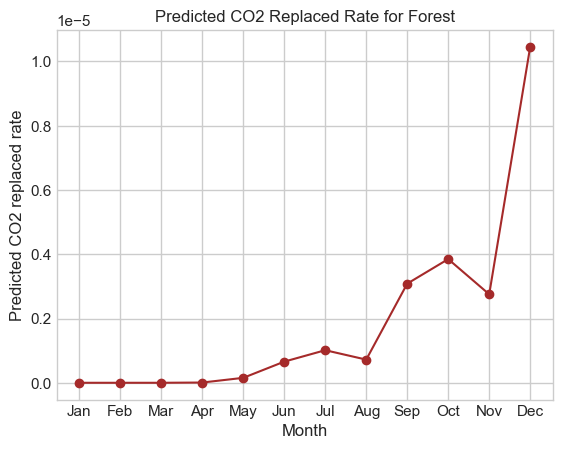

In [477]:
# Get the predicted values of co2_replacedRate from the Poisson regression model for forest regions
predicted_co2_replaced_forest = poisson_results_forest.predict(X_forest)

# Take the first 12 predicted values for the 12 months
predicted_co2_replaced_forest_monthly = predicted_co2_replaced_forest[:12]

# Create the line plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_numbers = list(range(1, 13))
plt.plot(month_numbers, predicted_co2_replaced_forest_monthly, color='brown', marker='o')
plt.xticks(month_numbers, months)
plt.xlabel('Month')
plt.ylabel('Predicted CO2 replaced rate')
plt.title('Predicted CO2 Replaced Rate for Forest')
plt.show()


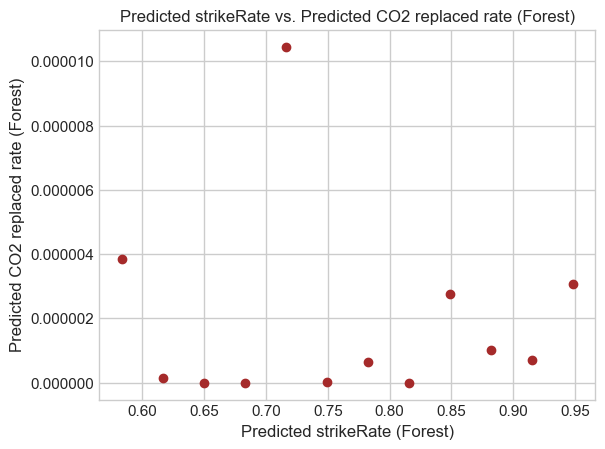

In [505]:
# Get the predicted values of strikeRate and CO2 replaced rate
predicted_strikeRate_forest = (
    prediction_data_forest['const'] * poisson_results_forest_strike.params['const'] +
    prediction_data_forest['month'] * poisson_results_forest_strike.params['month'] +
    prediction_data_forest['year'] * poisson_results_forest_strike.params['year']
)
predicted_co2_replaced_forest = poisson_results_forest_co2.mu[:12]  # Take the first 12 predicted values for the 12 months

# Create a scatter plot of predicted strikeRate vs. predicted CO2 replaced rate for the forest
plt.scatter(predicted_strikeRate_forest, predicted_co2_replaced_forest, color='brown')
plt.xlabel('Predicted strikeRate (Forest)')
plt.ylabel('Predicted CO2 replaced rate (Forest)')
plt.title('Predicted strikeRate vs. Predicted CO2 replaced rate (Forest)')

# Set tick label format to plain
plt.ticklabel_format(style='plain', axis='y')

plt.show()
